# PLEASE UPDATE THE CONFIG FILE BEFORE RUNNING THIS NOTEBOOK FILE

In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import time
from datetime import datetime
start_time = time.time()
start_datetime = datetime.now().strftime("%c")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
import requests
import json
import os
import yagmail
import warnings
warnings.filterwarnings("ignore")
from config import *

# Update
The bralwer data will be updated to current values either manually or using the Brawl Stars API
#### Brawl Stars API
The Brawl Stars API is designed to help the Community develop amazing tools, applications and websites in a secure and reliable way.

If you have selected Update = API in config.py file, then it uses Brawl Stars API which takes in player tag and fetches your player data. Then it updates in the Brawl_Stars.csv file. 
#### Manually
If you have selected Update = Manual in config.py file, then we can only update the csv file by entering name and updating their data manually. Press enter when you do not wish to continue the process.

Enter the name of the brawler without any spelling mistake.

In [4]:
df = pd.read_csv('Brawl_Stars.csv')
# df = df[['Brawler', 'Trophies', 'HighestTrophies', 'Power', 'Gadgets', 'Starpowers', 'Gears']]

if Update != 0:
    if Update == 'Manual':
        for i in range(df.shape[0]):
            name = str(input('Enter the Brawler name: ')).upper()
            if name != '':
                print(df[df['Brawler'] == name])
            else:
                break

            Trophies_input_s = str(input('Enter the current number of trophies of {}: '.format(name)))
            if Trophies_input_s != '':
                Trophies_input = int(Trophies_input_s)
                df.loc[df['Brawler'] == name,'Trophies'] = Trophies_input

            else:
                break
            print(df[df['Brawler'] == name])

            Power_input_s = str(input('Enter the current power of {}: '.format(name)))
            if Power_input_s != '':
                Power_input = int(Power_input_s)
                df.loc[df['Brawler'] == name,'Power'] = Power_input

            else:
                break
            print(df[df['Brawler'] == name])

    else:
        false = False
        true = True
        head = {'Authorization': 'Bearer '+ token}
        response = requests.get('https://api.brawlstars.com/v1/players/%23' + player_tag[1:], headers=head)
        json_dict = json.loads(response.text)

        brawlers = []
        trophies = []
        highestTrophies = []
        powers = []
        gears = []
        gadgets = []
        starpowers = []

        for brawler in json_dict['brawlers']:
            brawlers.append(brawler['name'])
            highestTrophies.append(brawler['highestTrophies'])
            trophies.append(brawler['trophies'])
            powers.append(brawler['power'])
            gears.append(len(brawler['gears']))
            gadgets.append(len(brawler['gadgets']))
            starpowers.append(len(brawler['starPowers']))

        df = pd.DataFrame()
        df['Brawler'] = brawlers
        df['Trophies'] = trophies
        df['HighestTrophies'] = highestTrophies
        df['Power'] = powers
        df['Gadgets'] = gadgets
        df['Starpowers'] = starpowers
        df['Gears'] = gears
    
if Overwrite:
    df.to_csv('Brawl_Stars.csv', index = False)
# df = df[['Brawler', 'Power', 'Trophies']]

# Sorting
The brawlers in csv file is sorted based on Power or Trophies selected in controls.

In [6]:
if Sorting == 'Trophies':
    df.sort_values(['Trophies','Power'], ascending = False, inplace = True)
    if Overwrite:
        df.to_csv('Brawl_Stars.csv', index = False)
    
if Sorting == 'Power':
    df.sort_values(['Power','Trophies'], ascending = False, inplace = True)
    if Overwrite:
        df.to_csv('Brawl_Stars.csv', index = False)

# Normalisation
It is a scaling technique method in which data points are shifted and rescaled so that they end up in a range of 0 to 1. It is also known as min-max scaling. The formula for calculating normalized score: X new = (X — X min)/(X max — X min).

Here,

- (X min, X max) = (0, 11 * mean(Trophies)/mean(Power)) for Trophies

- (X min, X max) = (1, 11) for Power

In [7]:
df.loc[len(df.index)] = ['WORST', 0, 0, 0, 0, 0, 0]
df_real = df.iloc[:-1,:]
df.loc[len(df.index)] = ['BEST', math.ceil(11*(df_real['HighestTrophies'].mean() / df_real['Power'].mean())),
                         math.ceil(11*(df_real['HighestTrophies'].mean() / df_real['Power'].mean())), 11, 2, 2, 6]
# df.loc[len(df.index)] = ['BEST', 11, math.floor(11*(df_real[df_real['Brawler'] == 'JANET']['Trophies'] / df_real[df_real['Brawler'] == 'JANET']['Power']))]
df_real = df.iloc[:-2,:]

df_norm = df.copy()  
df_norm['Trophies'] = df_norm['Trophies'] / math.ceil(11*(df_real['HighestTrophies'].mean() / df_real['Power'].mean()))
df_norm['HighestTrophies'] = df_norm['HighestTrophies'] / math.ceil(11*(df_real['HighestTrophies'].mean() / df_real['Power'].mean()))
df_norm['Power'] = df_norm['Power'] / 11
df_norm['Gadgets'] = df_norm['Power'] / 2
df_norm['Starpowers'] = df_norm['Power'] / 2
df_norm['Gears'] = df_norm['Power'] / 6

df_norm = df_norm.iloc[:-2,:]

# df_norm['Played'] = df_norm['Trophies'] - df_norm['Power'] # Difference between Trophies and power ❌
df_norm['Played'] = df_norm['Trophies'] / df_norm['Power'] # Ratio between Trophies and power ✅
# df_norm['Played'] = (df_norm['Trophies']**2) / df_norm['Power'] # Ratio multiplied by Trophies 
# df_norm['Played'] = df_norm['Trophies'] * (df_norm['Trophies'] - df_norm['Power']) # Difference multiplied by Trophies

df_real['Played'] = df_norm['Played']

In [8]:
# grouped mean by power
df_grouped_by_power_mean = df_norm.groupby('Power').mean()
df_grouped_by_power_mean.reset_index(inplace = True)

# Calculation of Angle of spread
tan_theta = (df_norm['Played'].max() - df_norm['Played'].min())/(1 + df_norm['Played'].max()*df_norm['Played'].min())
theta = math.degrees(math.atan(tan_theta))

In [9]:
if Logs:
    df_logs = pd.read_csv('Brawl_Stars_Logs.csv')

    Total_Trophies = df_real['Trophies'].sum()
    Angle_of_Spread = theta
    Correlation = df_norm['Trophies'].corr(df_norm['Power'])
    Correlation_Red = df_norm['Trophies'][df_norm['Played'] < 1].corr(df_norm['Power'][df_norm['Played'] < 1])
    Correlation_Green = df_norm['Trophies'][df_norm['Played'] > 1].corr(df_norm['Power'][df_norm['Played'] > 1])
    Power_Mean = df_real['Power'].mean()
    Trophies_Mean = df_real['Trophies'].mean()
    Power_Mean_Norm = df_norm['Power'].mean()
    Trophies_Mean_Norm = df_norm['Trophies'].mean()
    
    Datetime = str(datetime.now())
    Date = Datetime[:10]
    a,b,c,d = 0,0,0,0
    row = [Total_Trophies, Angle_of_Spread, Correlation, Correlation_Red, Correlation_Green, Power_Mean, Trophies_Mean, Power_Mean_Norm, Trophies_Mean_Norm, Date, Datetime]

    if df_logs.loc[df_logs.shape[0] - 1, 'Total Trophies'] == Total_Trophies:
        a += 1
    if df_logs.loc[df_logs.shape[0] - 1, 'Date'] == Date:
        b += 1
#     if df_logs.loc[df_logs.shape[0] - 1, 'Power Mean'] == round(Power_Mean, 6): ⚠️
#         c += 1
#     if df_logs.loc[df_logs.shape[0] - 1, 'Trophies Mean'] == round(Trophies_Mean, 6): ⚠️
#         d += 1
    
    
    if a+b < 2 :
        df_logs.loc[df_logs.shape[0]] = row
        if Overwrite:
            df_logs.to_csv('Brawl_Stars_Logs.csv', index = False)

In [10]:
corr_g = round(df_norm['Power'][df_norm['Played'] - 1 > 0].corr(df_norm['Trophies'][df_norm['Played'] - 1 > 0]), 2)
corr_r = round(df_norm['Power'][df_norm['Played'] - 1 < 0].corr(df_norm['Trophies'][df_norm['Played'] - 1 < 0]), 2)
corr = round(df_norm['Power'].corr(df_norm['Trophies']), 2)

In [11]:
df_ideal = pd.DataFrame()
df_ideal['Power'] = np.arange(0, 12, 1)
df_ideal['Trophies'] = [math.floor(11*(df_real['Trophies'].mean() / df_real['Power'].mean()))*math.log(x + 1,12) for x in df_ideal['Power']]

In [12]:
df_l = df_norm[df_norm['Played'] < 1]
df_l = df_l.sort_values(['Played','Trophies','Power'], ascending = [True, True, False])
df_l

Trophies_str = ''

for name in df_l['Brawler']:
    Trophies_str += name+'\n'

In [13]:
cal_end_time = time.time()

# Visualisations

## Player Data
The below table is in the decending order of Trophies, Power, Gears, Starpowers, Gadgets respectively.

In [14]:
df_real = df_real.sort_values(['Trophies','HighestTrophies','Power','Gears','Starpowers','Gadgets'], ascending = False)
df_real = df_real.reset_index(drop=True)
df_real

Brawler  Trophies  HighestTrophies  Power  Gadgets  Starpowers  Gears  \
0      EDGAR       606              607     11        2           2      3   
1       ROSA       557              579      9        2           2      0   
2     SHELLY       552              578      9        2           2      0   
3        PAM       509              521      9        2           1      0   
4     DARRYL       509              518      9        1           2      0   
5   EL PRIMO       508              541      9        2           2      0   
6       TARA       508              508     10        2           2      1   
7       BULL       508              508      9        2           1      0   
8         BO       507              548      9        2           1      0   
9      JACKY       507              519      9        2           2      0   
10       EMZ       507              509     10        2           2      1   
11       MAX       507              507      9        2           1      0   
12      RICO       506              512      9        2           1      0   
13     8-BIT       506              511      9        2           1      0   
14      CROW       504              504     10        2           1      1   
15     BROCK       504              504      9        1           2      0   
16      COLT       503              510      9        2           2      0   
17     PENNY       503              503      9        1           1      0   
18      POCO       502              516      9        2           1      0   
19       SAM       502              502      9        2           1      0   
20     MR. P       502              502      9        2           0      0   
21      BUZZ       502              502      9        0           0      0   
22       ASH       502              502      8        2           0      0   
23      NITA       501              515      9        2           2      0   
24      CARL       501              507      9        2           0      0   
25    JESSIE       501              505      9        2           2      0   
26  DYNAMIKE       501              504      9        2           2      0   
27     FRANK       501              501      9        2           1      0   
28   COLETTE       468              475      9        2           1      0   
29       LOU       465              470      9        2           1      0   
30       BEA       464              468      9        2           1      0   
31     JANET       461              461      9        2           1      0   
32     GRIFF       449              449      8        2           0      0   
33     SPIKE       440              440      9        2           0      0   
34    SPROUT       440              440      9        1           0      0   
35      NANI       439              444      9        2           0      0   
36    SQUEAK       437              437      9        0           0      0   
37      BIBI       435              448      9        2           0      0   
38    MORTIS       433              435      9        2           0      0   
39    BARLEY       430              430      9        2           1      0   
40     BYRON       430              430      9        1           1      0   
41      GALE       429              439      9        2           0      0   
42     RUFFS       424              424      9        2           0      0   
43     SURGE       423              433      9        2           0      0   
44      LOLA       410              410      8        1           0      0   
45       STU       408              413      9        2           0      0   
46      TICK       402              408      9        2           1      0   
47      OTIS       401              416      9        2           1      0   
48     AMBER       401              406      9        2           0      0   
49      GENE       397              397      9        2           0      0   
50     BELLE       390     

## Total Trophies (Logging Plot)
The below plot helps us track the trophy road or brawler progress over a period of time.

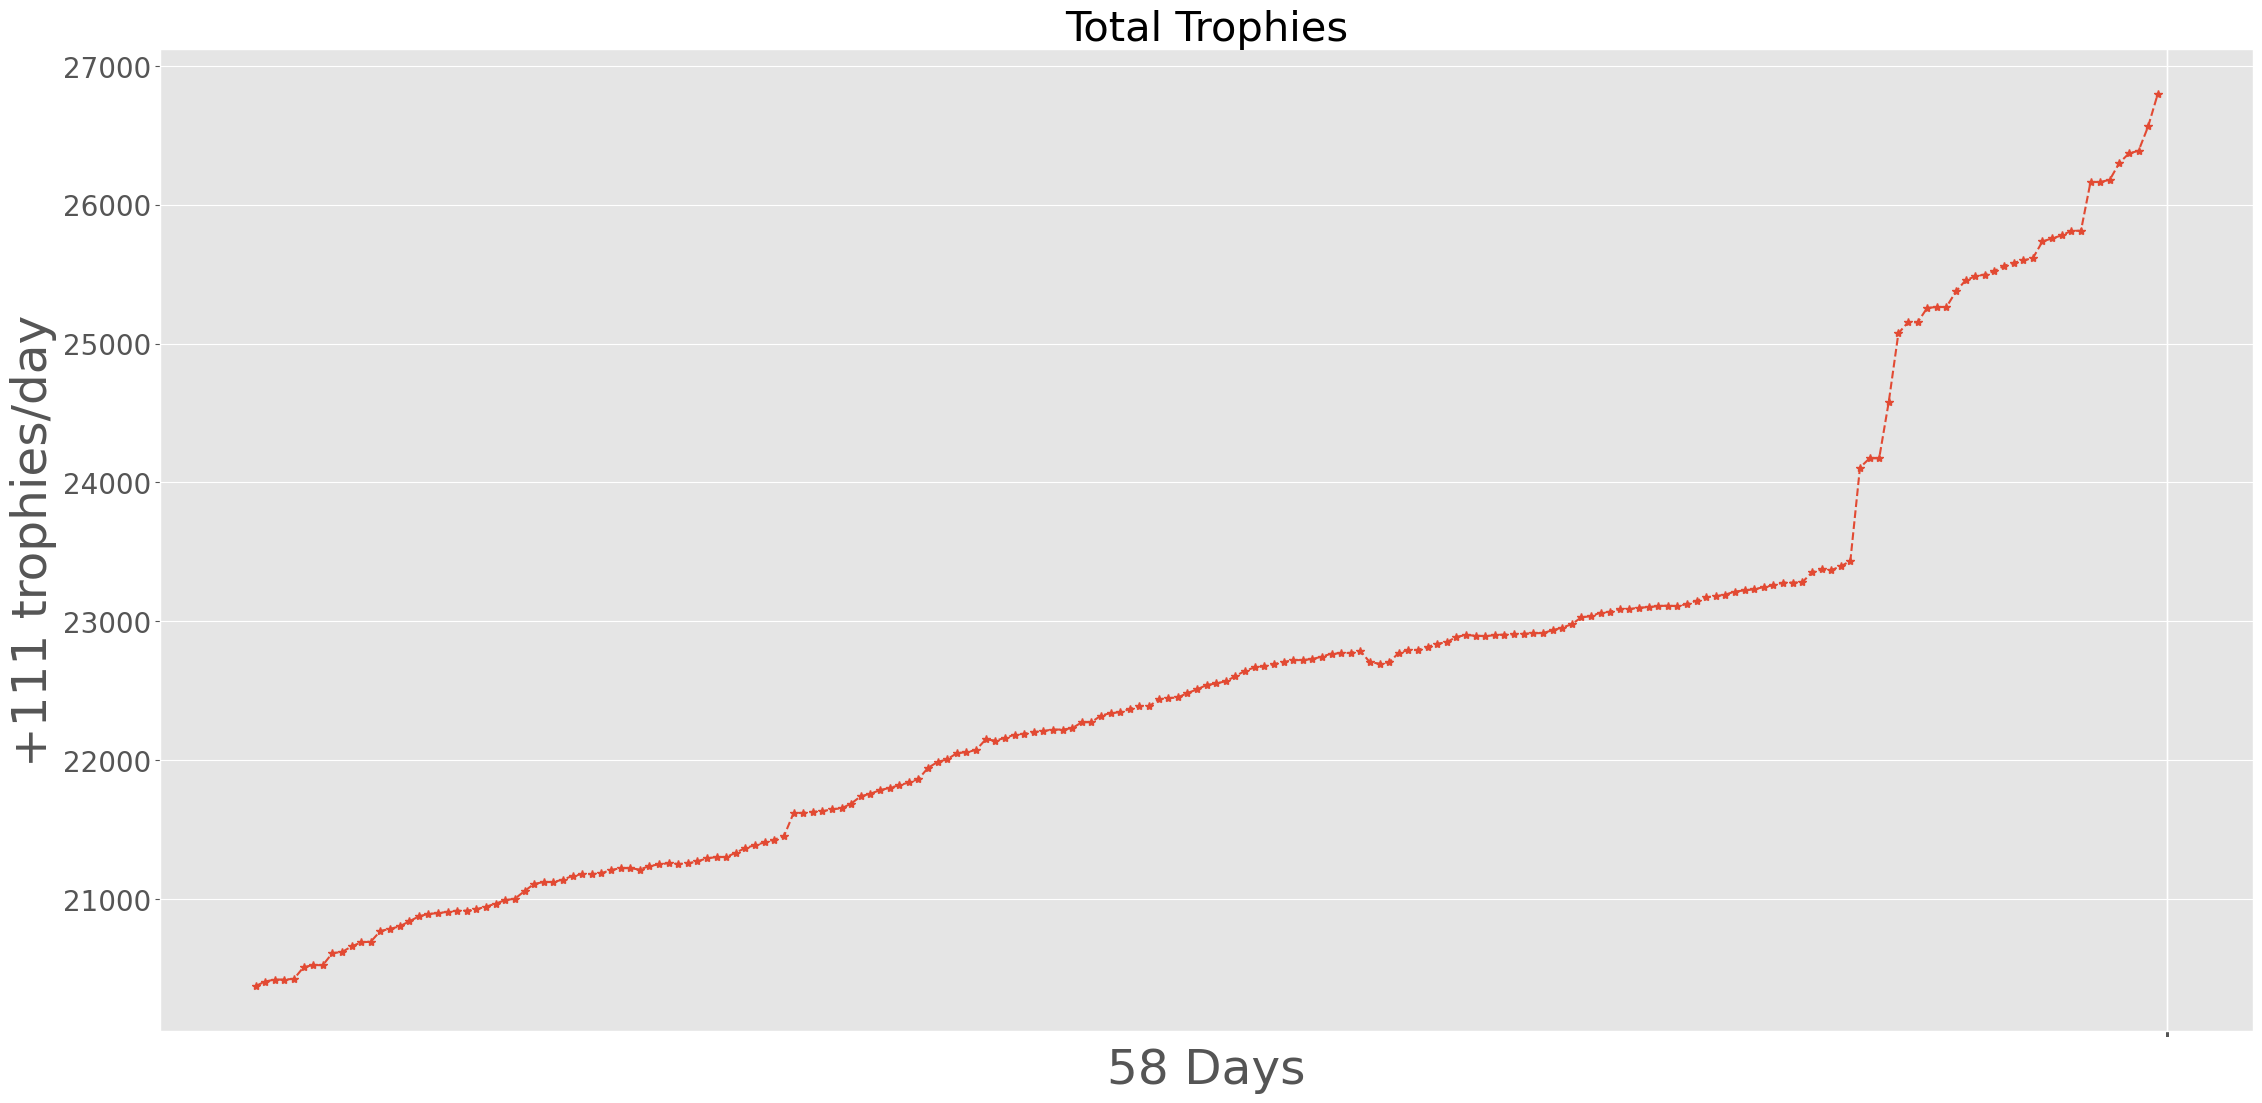

In [15]:
if Logs:
    plt.figure(figsize=(27,13), dpi=dpi)
    plt.plot(df_logs['Datetime'], df_logs['Total Trophies'], '*--')
    plt.xticks(['' for i in range(df_logs.shape[0])])
    plt.xlabel(str(df_logs['Date'].unique().shape[0])+' Days', size = 35)
    plt.ylabel('+'+str(round((df_logs['Total Trophies'].max() - df_logs['Total Trophies'].min())/df_logs['Date'].unique().shape[0]))+' trophies/day', size = 35)
    plt.yticks(size = 20)
    plt.title('Total Trophies', size = 30)
    plt.savefig('logs_Total_Trophies.png', dpi = dpi)     

## Angle of Spread (Logging Plot)
This is a metric used to monitor the spread of brawlers points (more the spread, less is the balance) in norm.trophy vs norm.power scatter plots (given later in the report). (Logging Plot) 

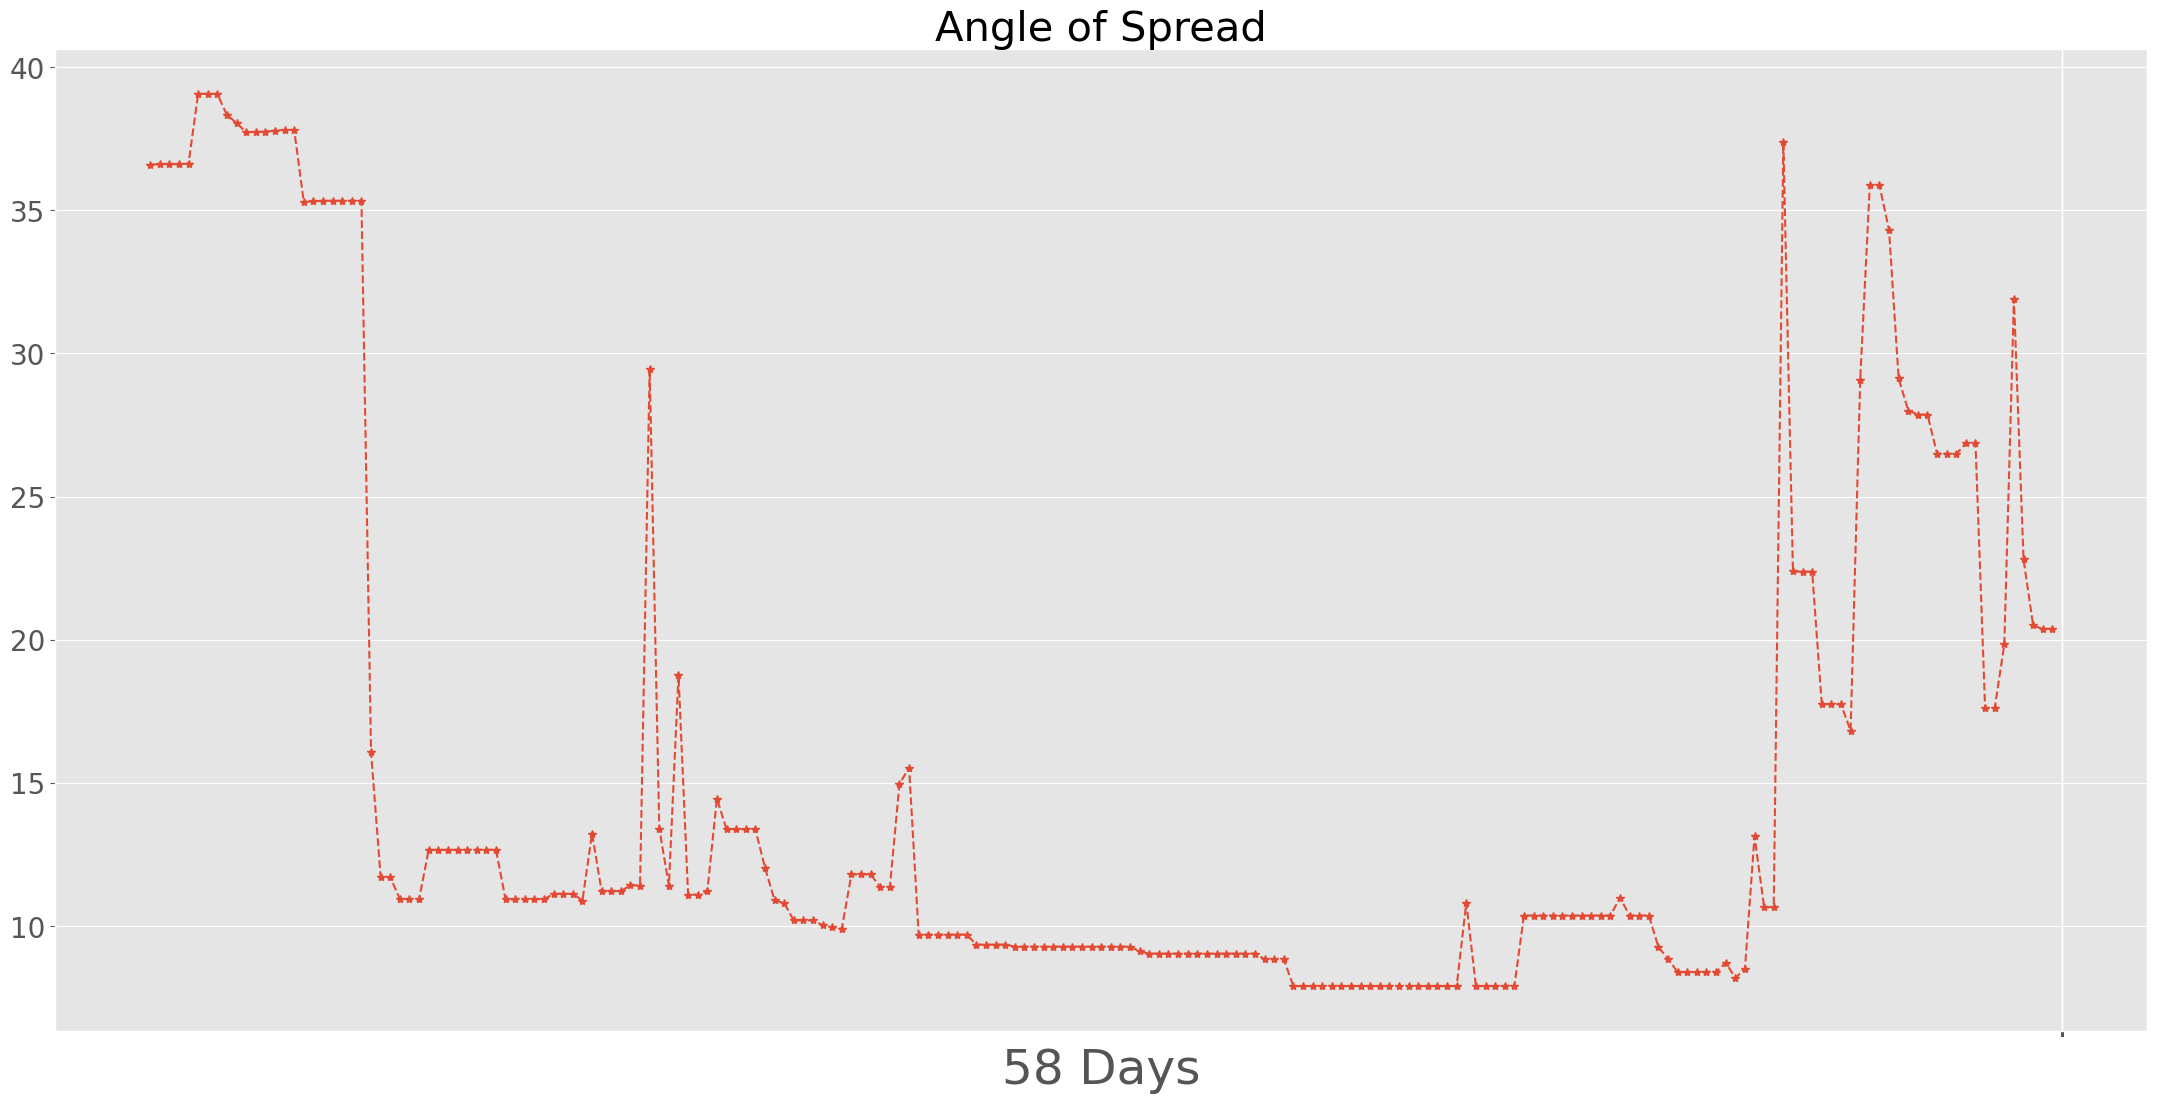

In [16]:
if Logs:
    plt.figure(figsize=(27,13), dpi=dpi)
    plt.plot(df_logs['Datetime'], df_logs['Angle of Spread'], '*--')
    plt.xticks(['' for i in range(df_logs.shape[0])])
    plt.xlabel(str(df_logs['Date'].unique().shape[0])+' Days', size = 35)
    plt.yticks(size = 20)
    plt.title('Angle of Spread', size = 30)
    plt.savefig('logs_Angle_of_Spread.png', dpi = dpi)     

## Player Overall Performance (Logging Plot)
The below plot is used to monitor the performance of player over a period of time.

This metric suggests us how many trophies do we have for the power we have for all our bralwers on average.

Performance = mean(Normalized Trophies) / mean(Normalized Power)

Performance < 1 => Under performing, lot of scope to grow, not learning fast enough.

Performance ~ 1 => Optimal Performance, scope of grow, learning fast enough.

Performance > 1 => Best Performance, Excellent Growth now, in future no scope to grow, learning super fast.

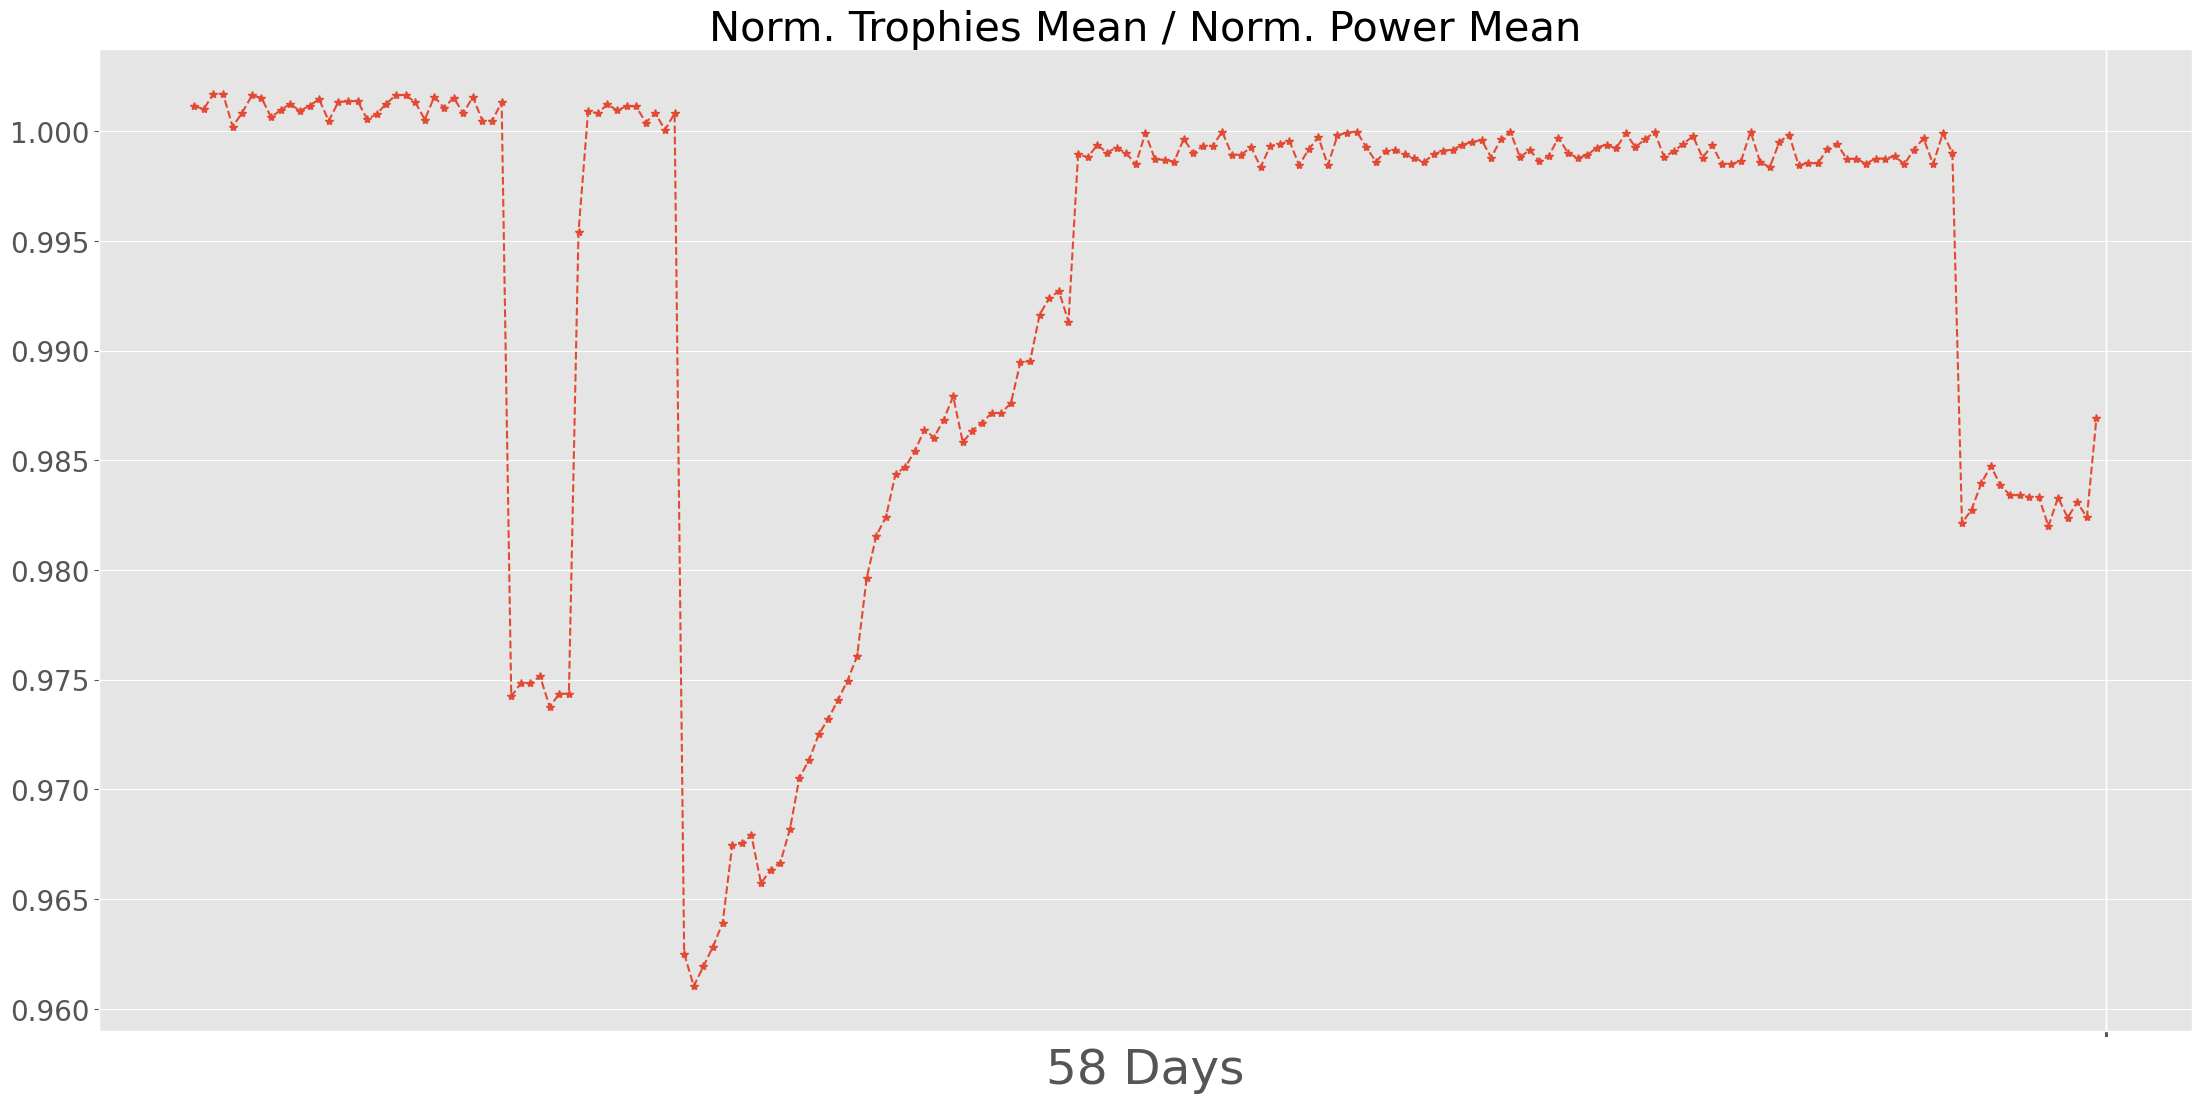

In [17]:
if Logs:
    plt.figure(figsize=(27,13), dpi=dpi)
    plt.plot(df_logs['Datetime'], df_logs['Trophies Mean Norm'] / df_logs['Power Mean Norm'], '*--')
    plt.xticks(['' for i in range(df_logs.shape[0])])
    plt.yticks(size = 20)
    plt.xlabel(str(df_logs['Date'].unique().shape[0])+' Days', size = 35)
    plt.title('Norm. Trophies Mean / Norm. Power Mean', size = 30)
    plt.savefig('logs_Trophies_by_Power_norm.png', dpi = dpi)     

## Correlation of Brawlers
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

The below plot is used to track the correlation of our all brawlers, good brawlers, bad brawlers.

Higher the correlation, lesser the spread and vice versa. In this case correlation is causation unless there are any outliers.

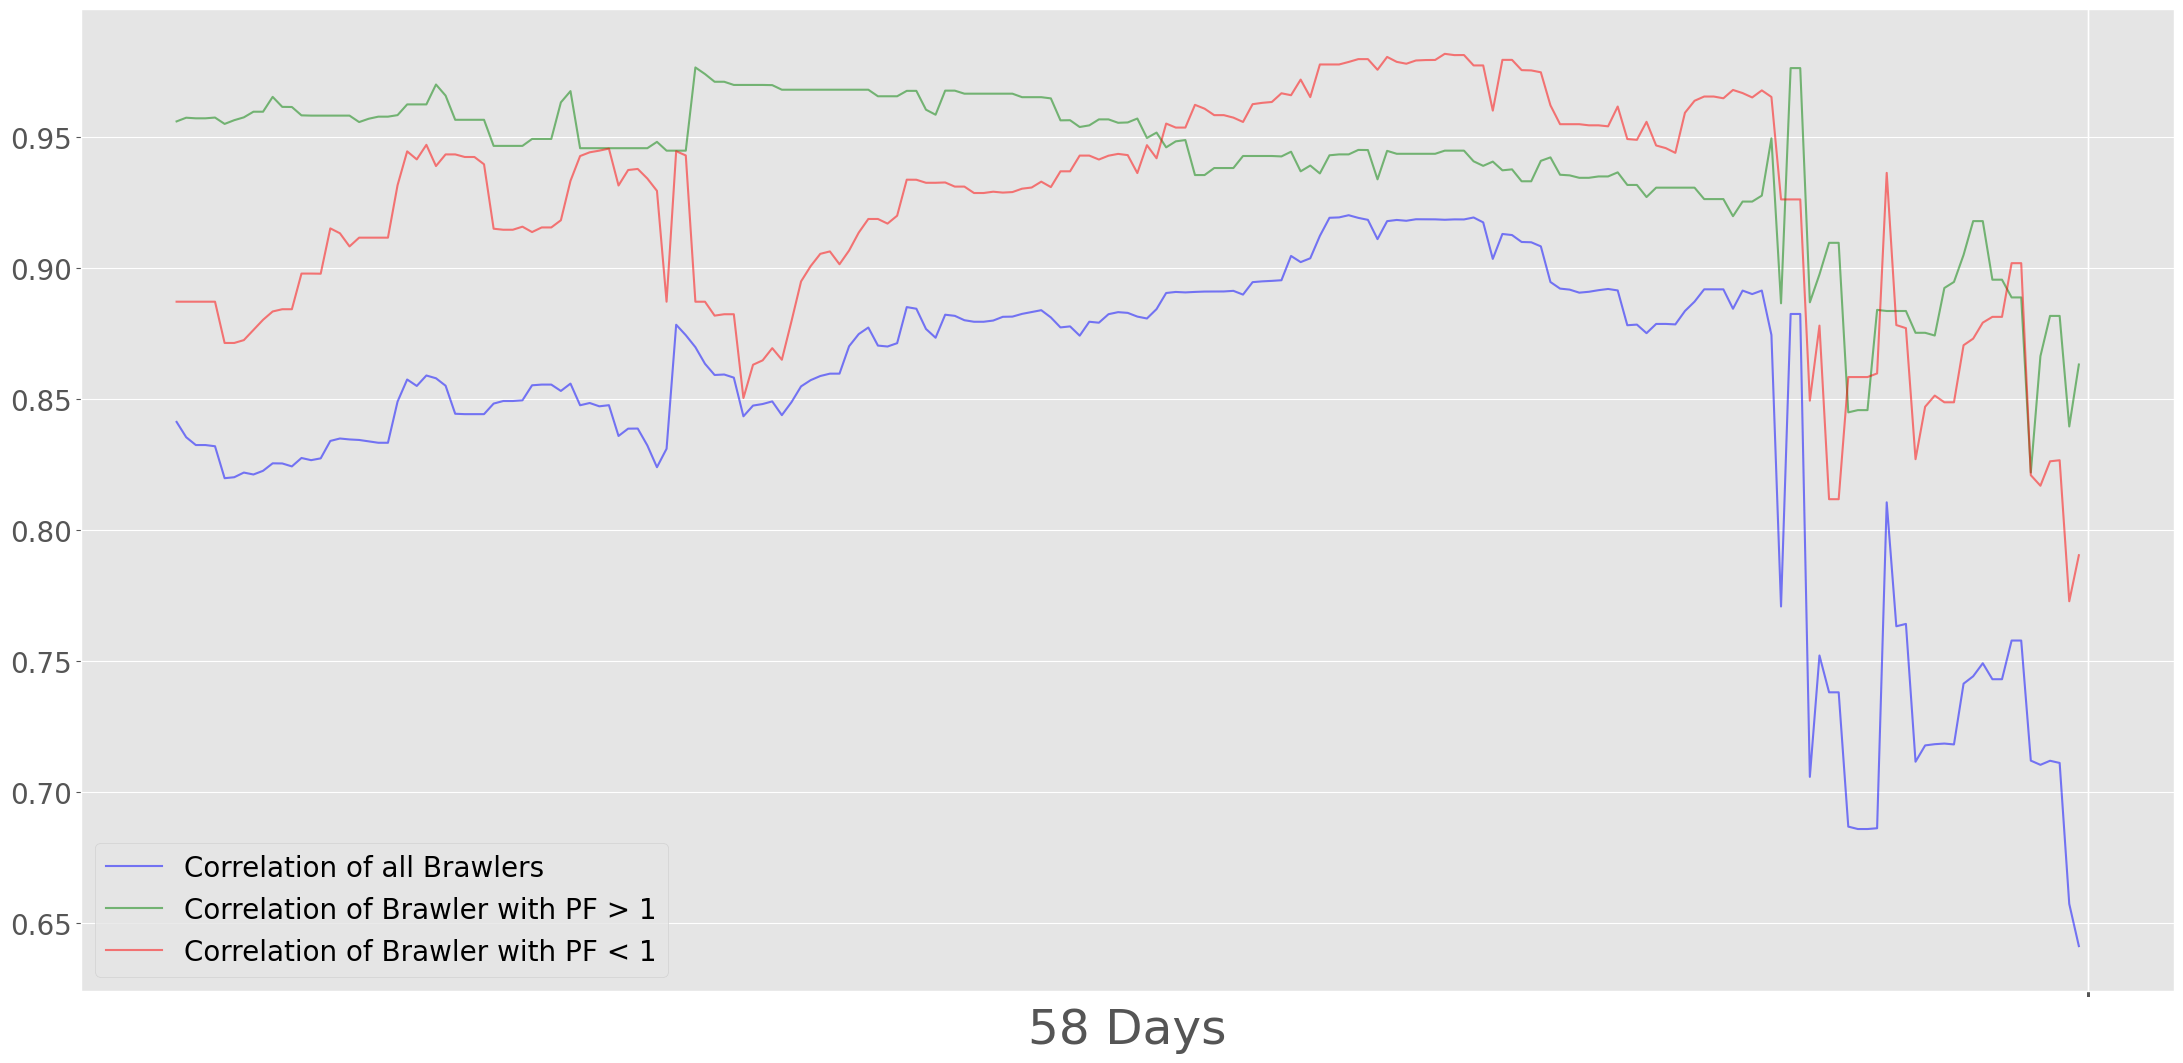

In [18]:
if Logs:
    plt.figure(figsize=(27,13), dpi=dpi)
    plt.plot(df_logs['Datetime'], df_logs['Correlation'], '-', alpha = 0.5, color = 'blue')
    plt.plot(df_logs['Datetime'], df_logs['Correlation Green'], '-', alpha = 0.5, color = 'green')
    plt.plot(df_logs['Datetime'], df_logs['Correlation Red'], '-', alpha = 0.5, color = 'red')
    plt.xticks(['' for i in range(df_logs.shape[0])])
    plt.yticks(size = 20)
    plt.xlabel(str(df_logs['Date'].unique().shape[0])+' Days', size = 35)
    plt.legend(['Correlation of all Brawlers','Correlation of Brawler with PF > 1','Correlation of Brawler with PF < 1'], fontsize = 20)
    plt.savefig('logs_Correlation.png', dpi = dpi)     

## Trophy vs Brawler

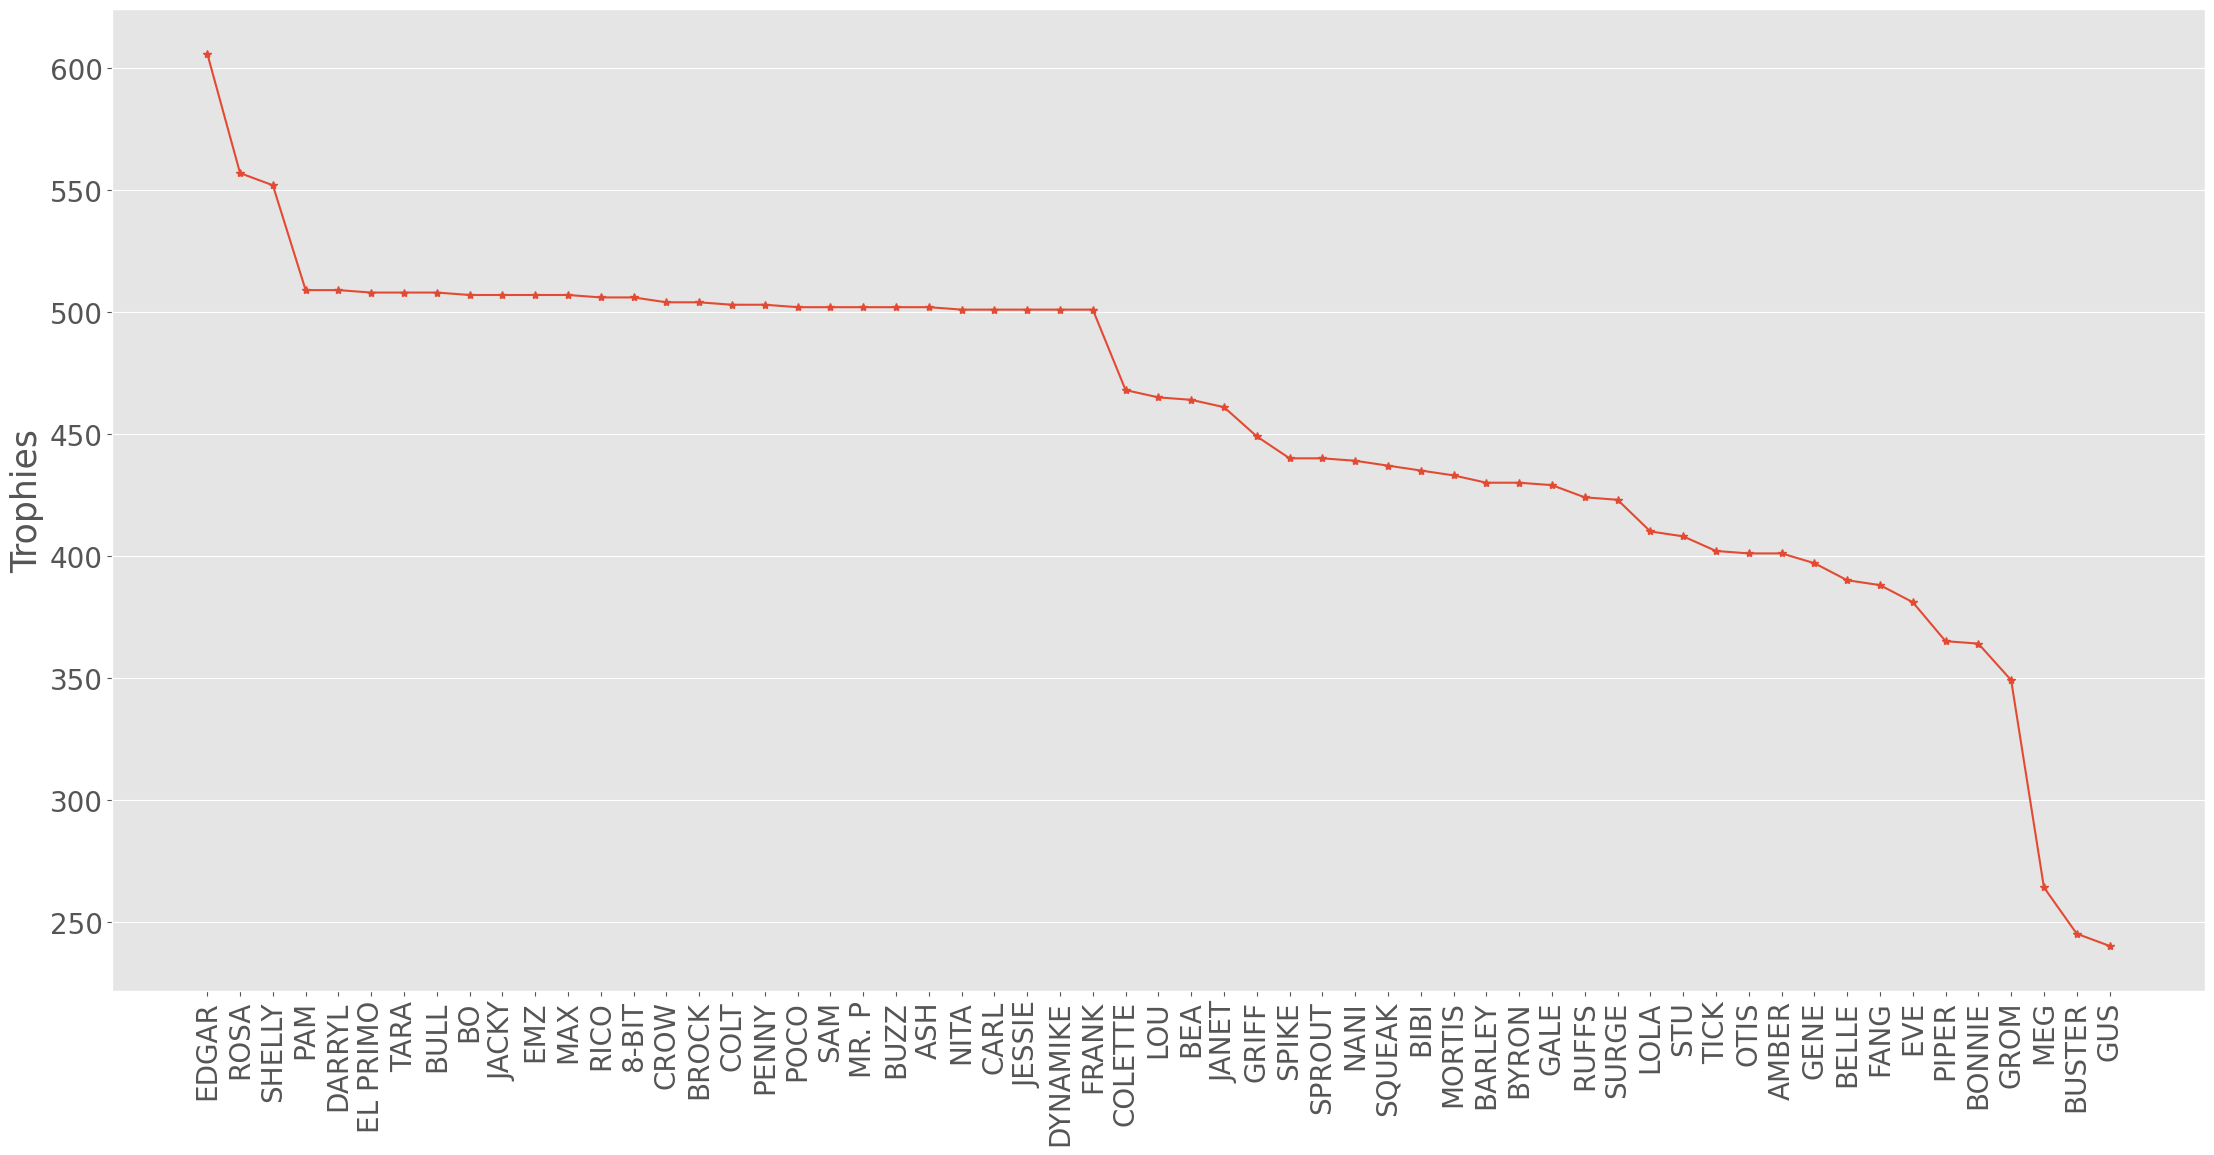

In [19]:
plt.figure(figsize=(27,13), dpi=dpi)
plt.plot(df_real['Brawler'], df_real['Trophies'], '*-')
plt.yticks(size = 20)
plt.xticks(size = 20, rotation = 'vertical')
plt.ylabel('Trophies', size = 25)
plt.grid(axis = 'x') 

## Distribution of Power Values

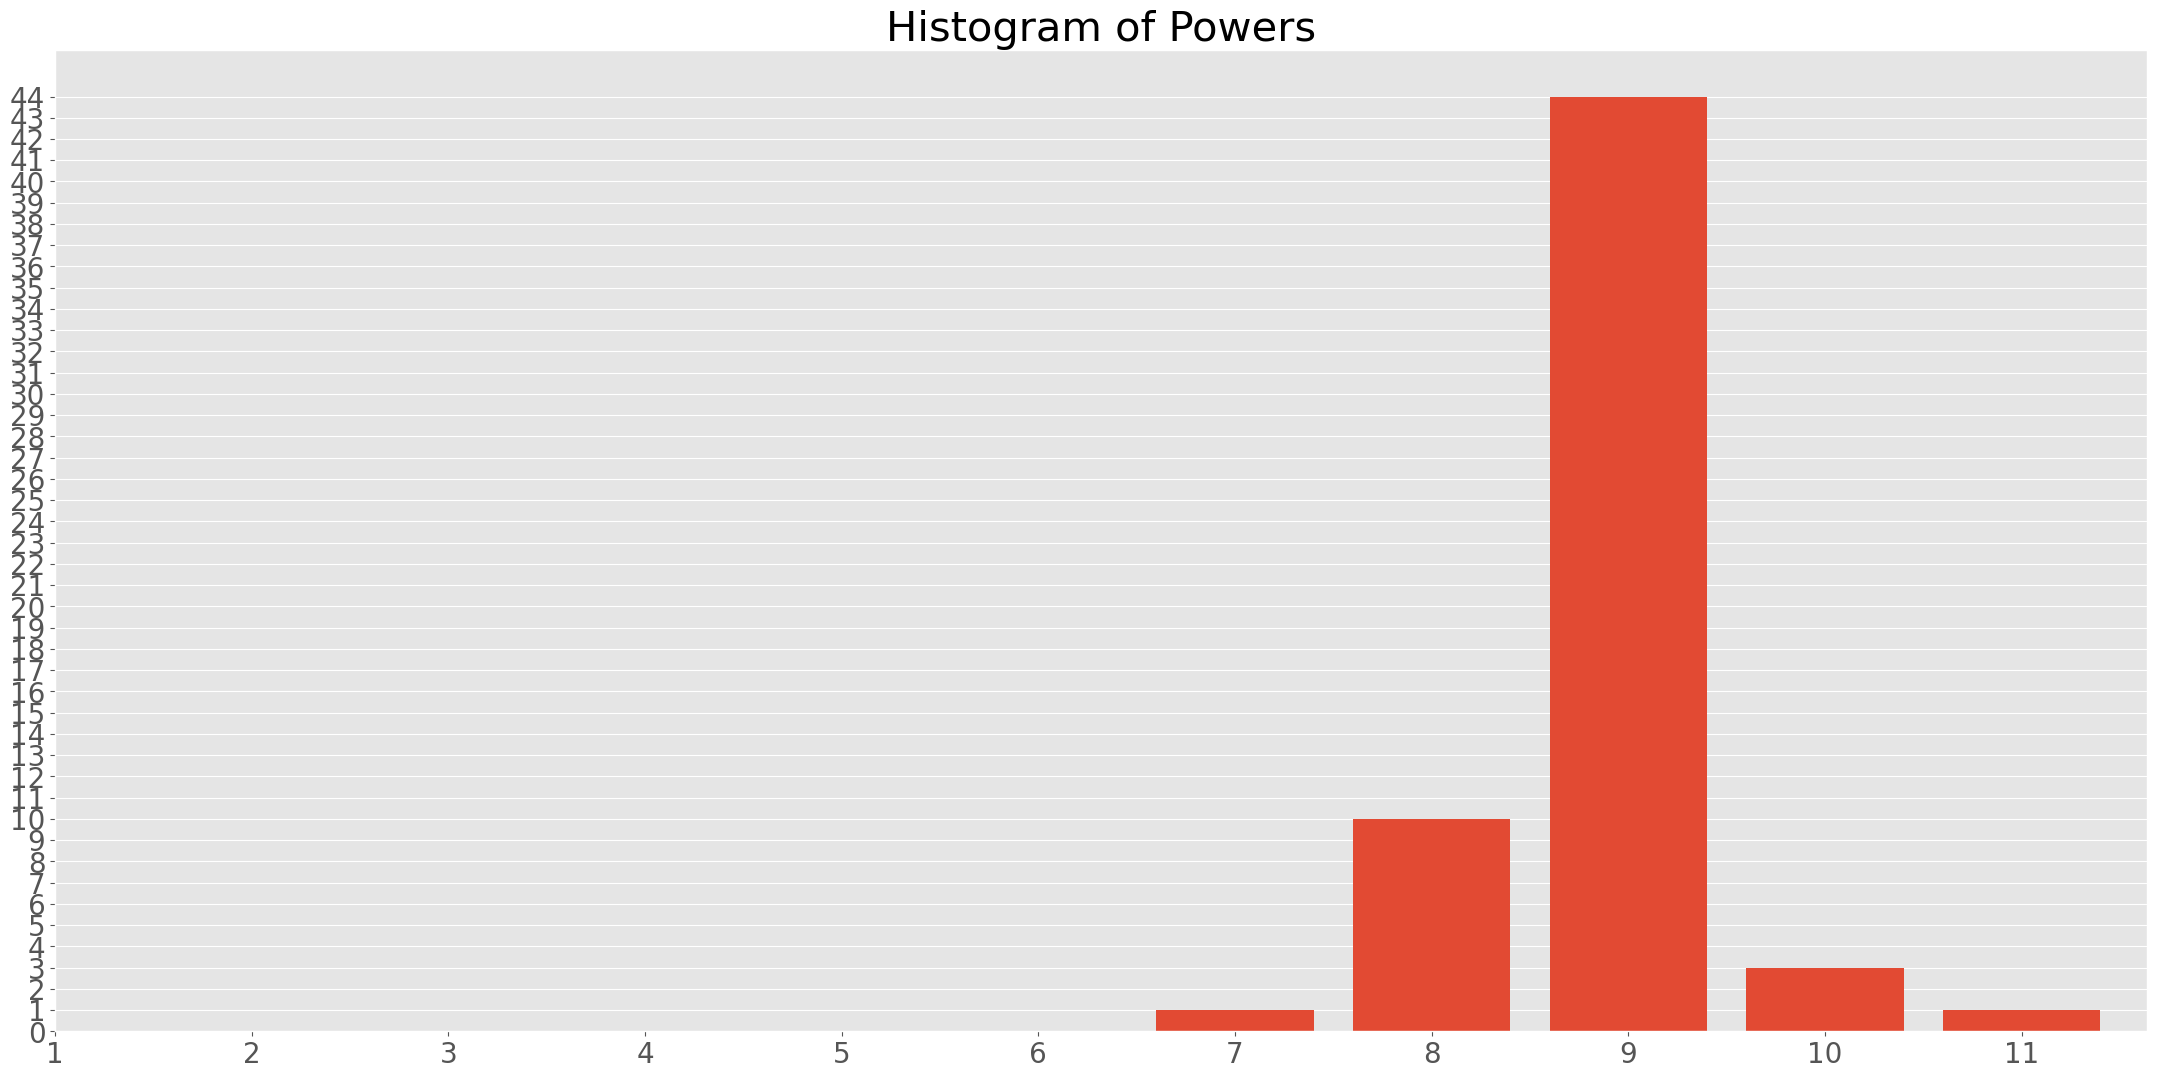

In [20]:
plt.figure(figsize=(27,13), dpi=dpi)
plt.bar(df_real['Power'].value_counts().index, df_real['Power'].value_counts())
plt.title('Histogram of Powers', size = 30)
plt.yticks(range(df_real['Power'].value_counts().max() + 1), size = 20)
plt.xticks(np.arange(1,12,1),size = 20)
plt.grid(axis = 'x') 

## Distribution of Trophies

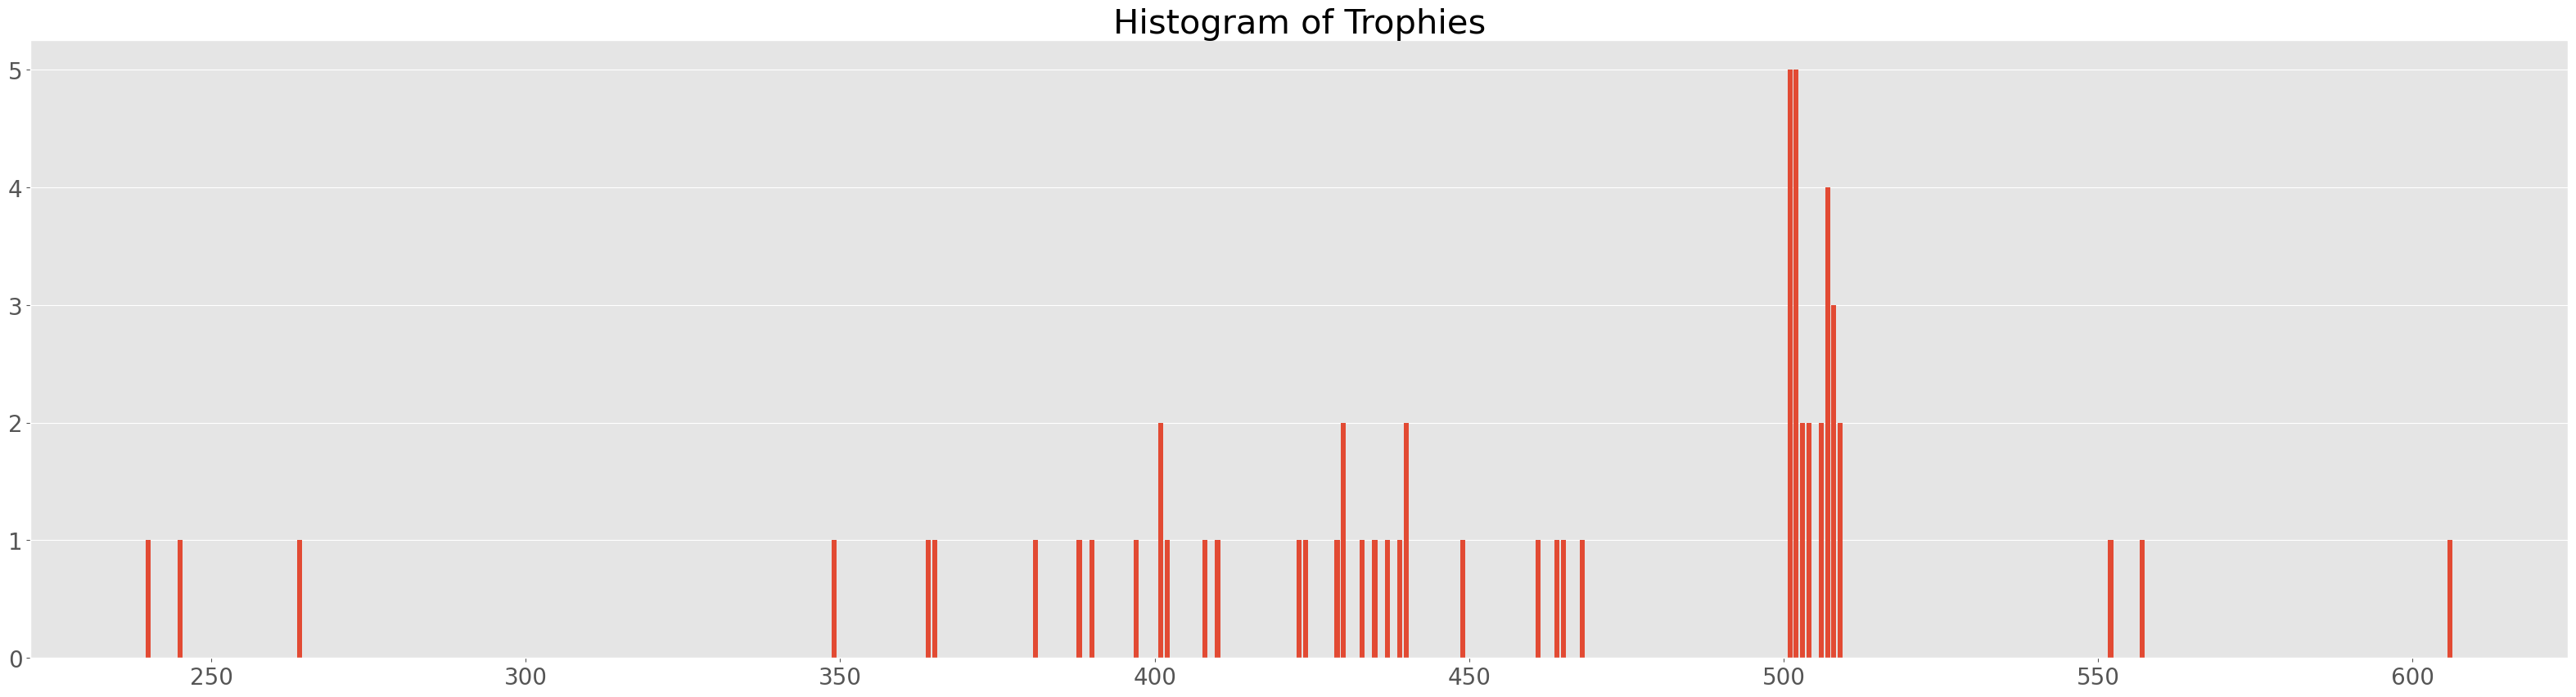

In [21]:
plt.figure(figsize=(40,10), dpi=dpi)
plt.bar(df_real['Trophies'].value_counts().index, df_real['Trophies'].value_counts())
plt.title('Histogram of Trophies', size = 30)
plt.yticks(range(df_real['Trophies'].value_counts().max() + 1), size = 20)
plt.xticks(size = 20)
plt.grid(axis = 'x') 

In [22]:
df_norm = df_norm.sort_values(['Power','Trophies','HighestTrophies','Gears','Starpowers','Gadgets'], ascending = False)

## Power, Trophies vs Brawler

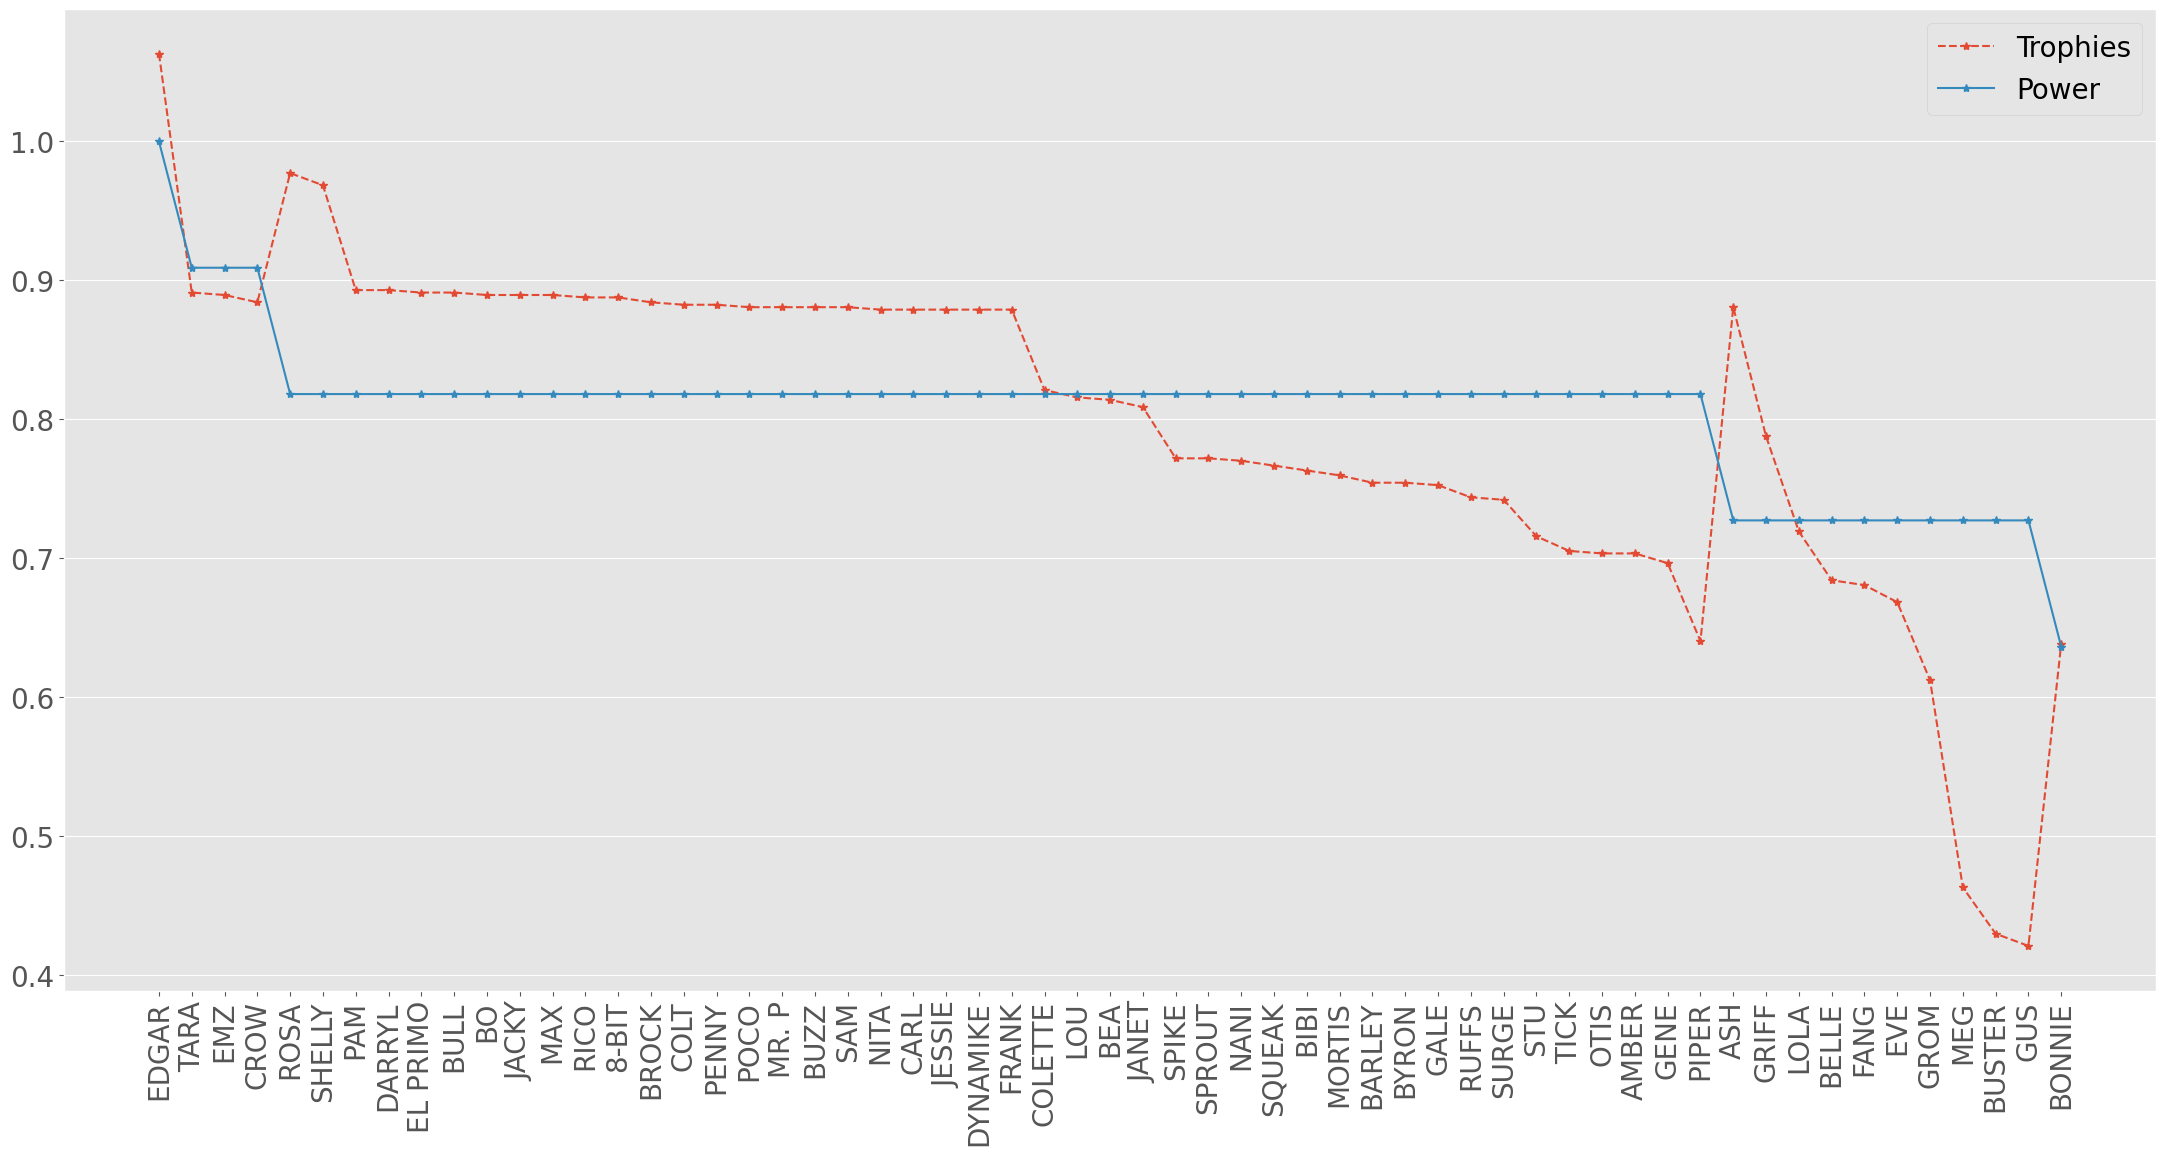

In [23]:
plt.figure(figsize=(27,13), dpi=dpi)
plt.plot(range(df_norm.shape[0]), df_norm['Trophies'], '*--')
plt.plot(range(df_norm.shape[0]), df_norm['Power'], '*-')
# plt.plot(range(df_norm.shape[0]), df_norm['Played'], '*-')
plt.xticks(range(df_norm.shape[0]), df_norm['Brawler'], rotation = 'vertical', size = 20) #range(df_norm.shape[0])
plt.yticks(size = 20)
plt.legend(['Trophies', 'Power'], fontsize = 20) # , 'Played'
plt.title('')
plt.grid(axis = 'x') 

In [24]:
df_norm = df_norm.sort_values(['Trophies','Power','HighestTrophies','Gears','Starpowers','Gadgets'], ascending = False)

## Trophies, Power vs Brawler

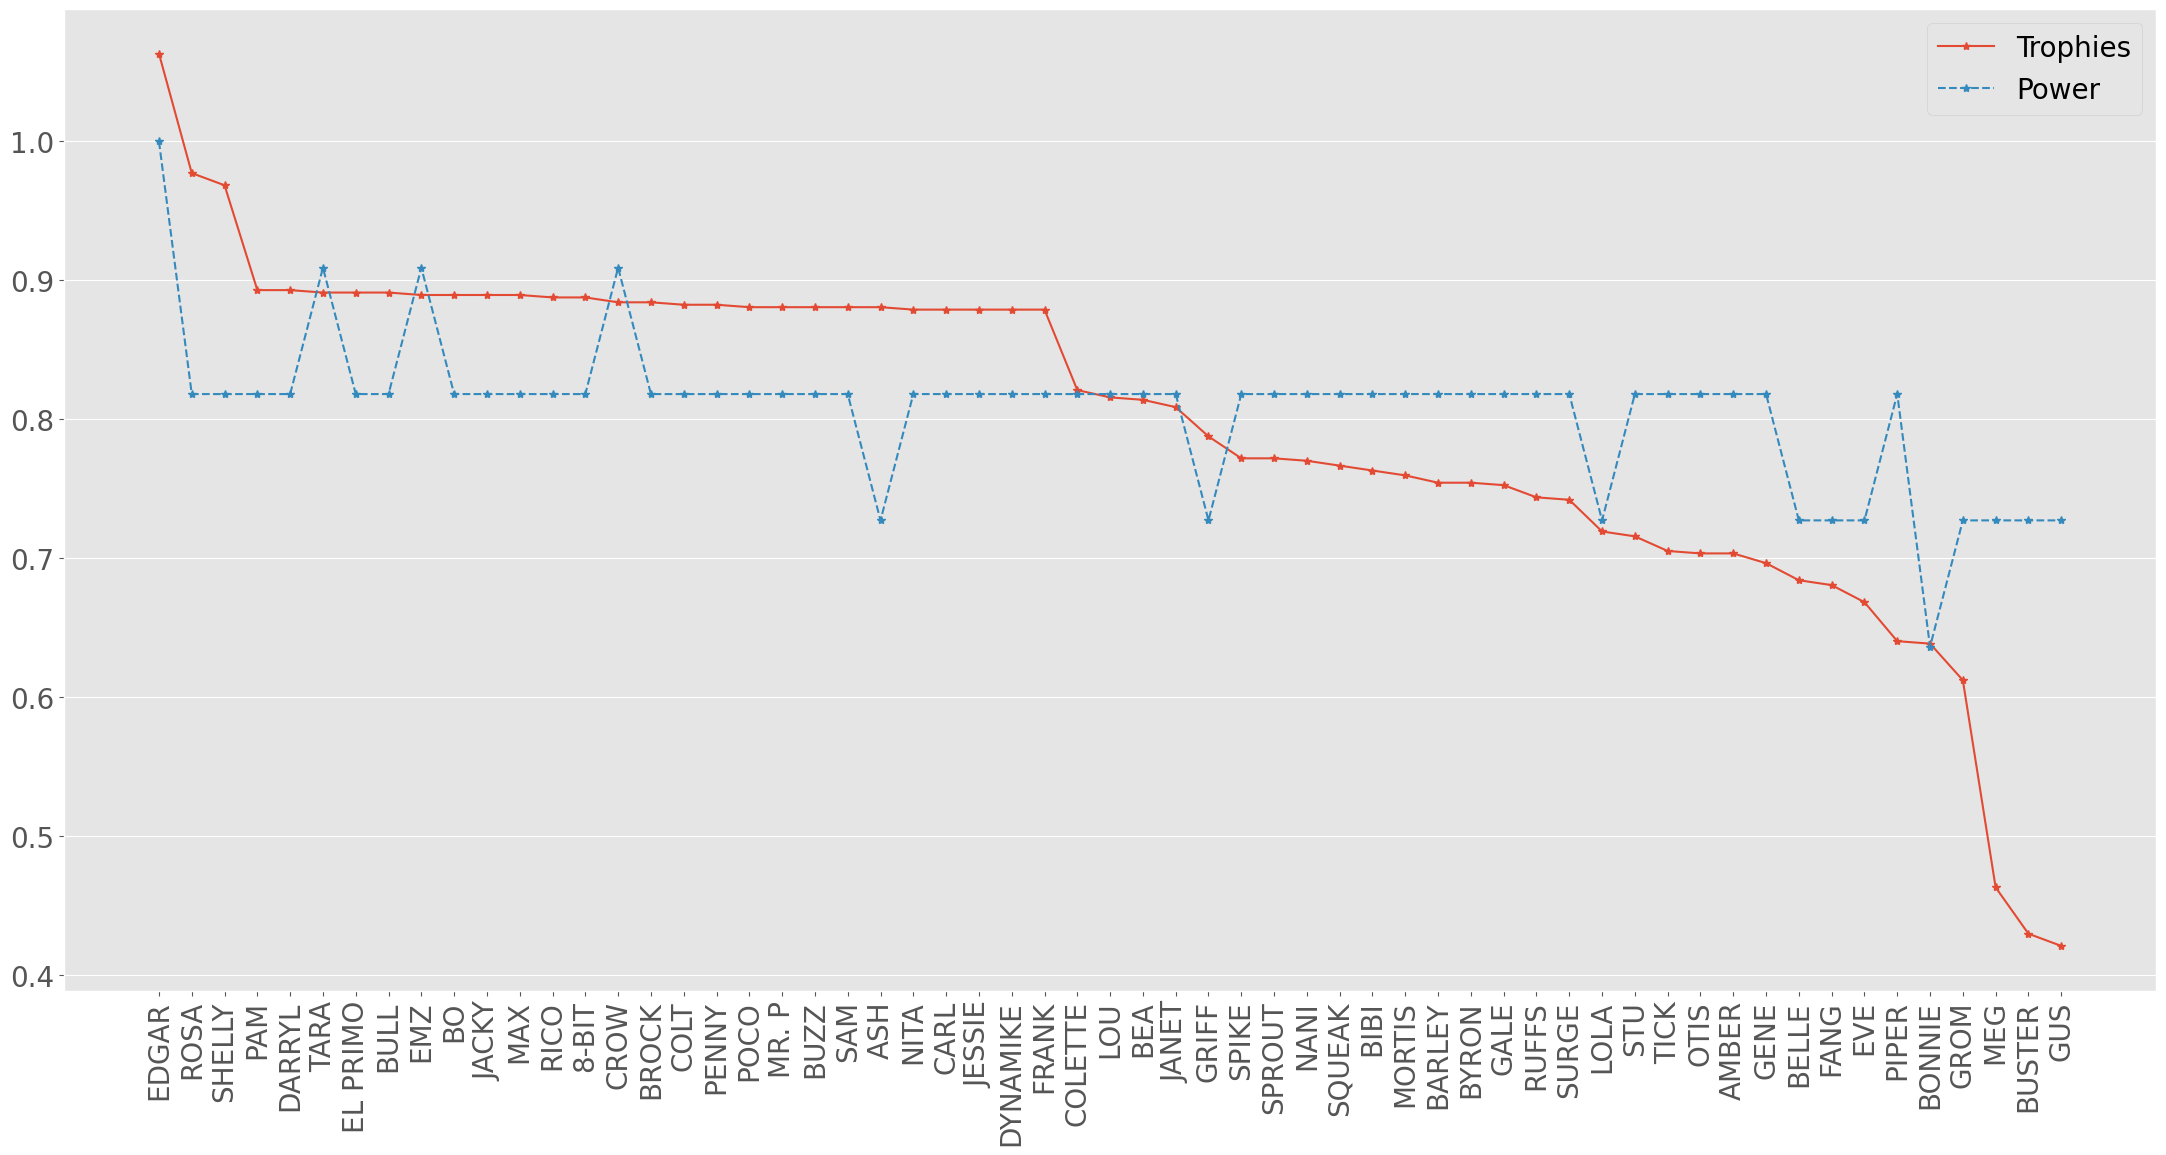

In [25]:
plt.figure(figsize=(27,13), dpi=dpi)
plt.plot(range(df_norm.shape[0]), df_norm['Trophies'], '*-')
plt.plot(range(df_norm.shape[0]), df_norm['Power'], '*--')
plt.xticks(range(df_norm.shape[0]), df_norm['Brawler'], rotation = 'vertical', size = 20) #range(df_norm.shape[0])
plt.yticks(size = 20)
plt.legend(['Trophies', 'Power'], fontsize = 20) # , 'Played'
plt.grid(axis = 'x') 

## Trophies vs Power Scatter Plot with Logarithmic Trendline

In [26]:
fig = px.scatter(df_real, x = 'Power', y = 'Trophies',hover_name="Brawler",color = 'Played',trendline = 'ols',
                 trendline_options=dict(log_x=True),
                 width=800, height=800, color_discrete_sequence=px.colors.qualitative.Dark24) #, color = 'Played'
# fig.add_trace(go.Scatter(x=[0, 11], y=[0, math.floor(11*(df_real['Trophies'].mean() / df_real['Power'].mean()))], showlegend=False))
fig.add_trace(go.Scatter(x=df_ideal['Power'], y=df_ideal['Trophies'], showlegend=False))
fig.write_image('scatter_plot_1.png')
fig.show()

## Trophies vs Power Scatter Plot with Linear Trendline

In [27]:
fig = px.scatter(df_norm, x = 'Power', y = 'Trophies',hover_name="Brawler", color = 'Played',trendline = 'ols',
#                  trendline_options=dict(log_x=True),
                 width=800, height=800, color_discrete_sequence=px.colors.qualitative.Antique) #,hover_data = 'Brawler', text = 'Brawler')
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], showlegend=False))
fig.show()

In [28]:
df_norm = df_norm.sort_values(['Played','Trophies','Power','Gears','Starpowers','Gadgets','HighestTrophies'], ascending = [True, True, False, False, False, False, True])

## Trophies vs Power Scatter Plot
The below plot helps us understand and compare distribution of under-performing, over-performing and all brawlers.

Here, Priority Factor (PF) = Norm. Trophies / Norm. Power. Which is also inverse of winning chance.

If PF < 1, then the brawler is under-performing. They are red color.

If PF ~ 1, then the brawler is performing ideally. They are blue color for exactly = 1.

If PF > 1, then the brawler is over-performing. They are green color.

Red and Green lines connects origin to least and beat performing brawlers respectively. Our goal is to bring them as close as possible to attain balance. This can be done by push red point upwards i.e, gain trophies for red brawlers or increase power for green brawlers.

The blue line connects the origin to the imaginary optimal brawler.

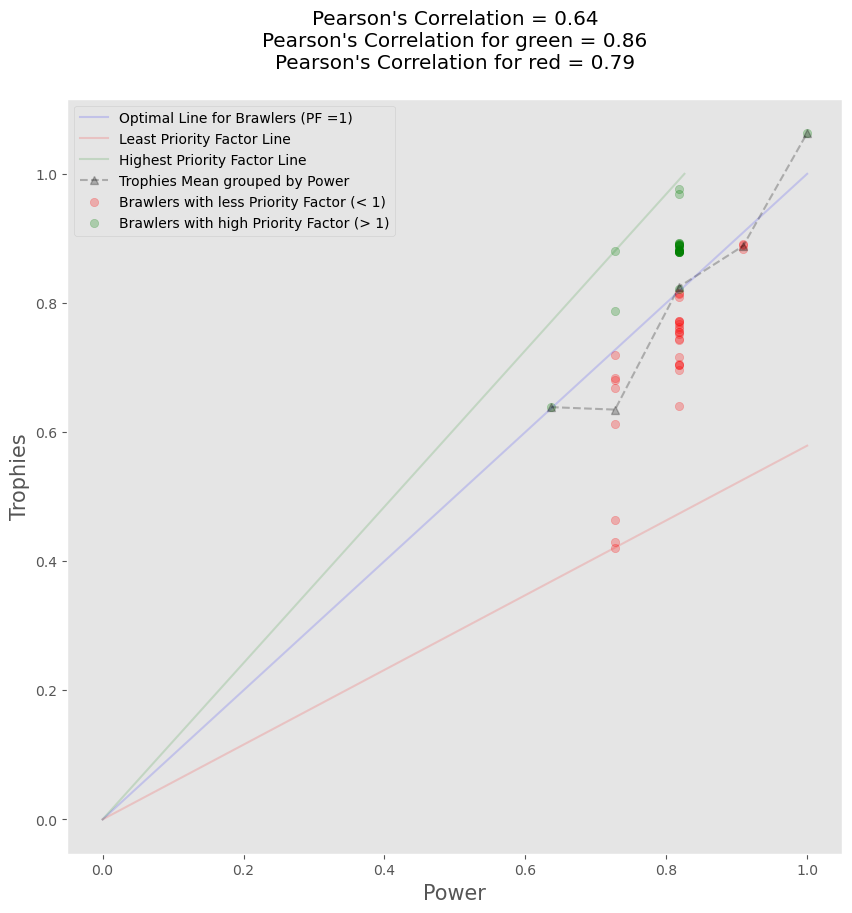

In [29]:
plt.figure(figsize=(10, 10), dpi=dpi)

plt.scatter(df_norm['Power'][df_norm['Played'] - 1 < 0], df_norm['Trophies'][df_norm['Played'] - 1 < 0], color = 'red', alpha = 0.25)
plt.scatter(df_norm['Power'][df_norm['Played'] - 1 > 0], df_norm['Trophies'][df_norm['Played'] - 1 > 0], color = 'green', alpha = 0.25)

plt.plot(range(2), range(2), color = 'blue', alpha = 0.15)
plt.plot([0, 1], [0, df_norm['Played'].min()], color = 'red', alpha = 0.15)
plt.plot([0, 1 / df_norm['Played'].max()], [0, 1], color = 'green', alpha = 0.15)

plt.plot(df_grouped_by_power_mean['Power'], df_grouped_by_power_mean['Trophies'], '^--', color = 'black', alpha = 0.25)

# plt.xticks(df_norm['Power'].unique(), size = 10)
# plt.yticks(df_norm['Trophies'].unique(), size = 10)
plt.xlabel("Power", size = 15)
plt.ylabel("Trophies", size = 15)
plt.title('Pearson\'s Correlation = '+str(corr)+'\n'+'Pearson\'s Correlation for green = '+str(corr_g)+'\n'+'Pearson\'s Correlation for red = '+str(corr_r)+'\n')
plt.grid(alpha = 0.25)
# for i, label in enumerate(df_norm['Brawler']):
#     plt.annotate(label, (df_norm.iloc[i,1], df_norm.iloc[i,2]), alpha = 0.5)

# plt.annotate(l_brawler+'\n'+str(round(l_af, 3))+'\n'+str(l_Trophies)+','+str(l_power)+'\n'
#              , (df_norm['Power'][df_norm['Brawler'] == l_brawler].iloc[0], df_norm['Trophies'][df_norm['Brawler'] == l_brawler].iloc[0])
#              , ha = 'center', arrowprops = dict(facecolor ='red',shrink = 0.5, alpha = 0.5), size = 13, color = 'red', alpha = 0.5)


# plt.annotate(h_brawler+'\n'+str(round(h_af, 3))+'\n'+str(h_Trophies)+','+str(h_power)+'\n'
#              , (df_norm['Power'][df_norm['Brawler'] == h_brawler].iloc[0], df_norm['Trophies'][df_norm['Brawler'] == h_brawler].iloc[0])
#              , ha = 'center', arrowprops = dict(facecolor ='orange',shrink = 0.5, alpha = 0.5), size = 13, color = 'orange', alpha = 1)

# if brawler != '':
#     if df_norm['Played'][df_norm['Brawler'] == brawler].iloc[0] < 1:
#         plt.annotate(brawler+'\n'+str(round(attention_factor, 3))+'\n'+str(Trophies)+','+str(power)+'\n'
#                      , (df_norm['Power'][df_norm['Brawler'] == brawler].iloc[0], df_norm['Trophies'][df_norm['Brawler'] == brawler].iloc[0])
#                  , ha = 'center', arrowprops = dict(facecolor ='black',shrink = 0.5, alpha = 0.5), size = 13, color = 'black', alpha = 0.5)
#     elif df_norm['Played'][df_norm['Brawler'] == brawler].iloc[0] > 1:
#         plt.annotate(brawler+'\n'+str(round(attention_factor, 3))+'\n'+str(Trophies)+','+str(power)+'\n'
#                      , (df_norm['Power'][df_norm['Brawler'] == brawler].iloc[0], df_norm['Trophies'][df_norm['Brawler'] == brawler].iloc[0])
#                  , ha = 'center', arrowprops = dict(facecolor ='black',shrink = 0.5, alpha = 0.5), size = 13, color = 'green', alpha = 0.5)
#     else:
#         plt.annotate(brawler+'\n'+str(round(attention_factor, 3))+'\n'+str(Trophies)+','+str(power)+'\n'
#                      , (df_norm['Power'][df_norm['Brawler'] == brawler].iloc[0], df_norm['Trophies'][df_norm['Brawler'] == brawler].iloc[0])
#                  , ha = 'center', arrowprops = dict(facecolor ='black',shrink = 0.5, alpha = 0.5), size = 13, color = 'blue', alpha = 0.5)

plt.legend(['Optimal Line for Brawlers (PF =1)',
            'Least Priority Factor Line',
            'Highest Priority Factor Line',
            'Trophies Mean grouped by Power',
            'Brawlers with less Priority Factor (< 1)',
            'Brawlers with high Priority Factor (> 1)'])
plt.savefig('scatter_plot.png', dpi = dpi)
 

## Trophies, Power, Priority Factor vs Brawlers
The below plot helps us understand the brawlers trophies, power, priority factor relative to others to chose them based on the goal of the match. For example, for a match we want to play with brawler with high winning chance and easy opponents and high power to complete a quest. Or we want to choose a brawler with high winning chance but tough opponents and high power. This graph helps us pick the most optimal brawler for that match quickly and quantitatively.


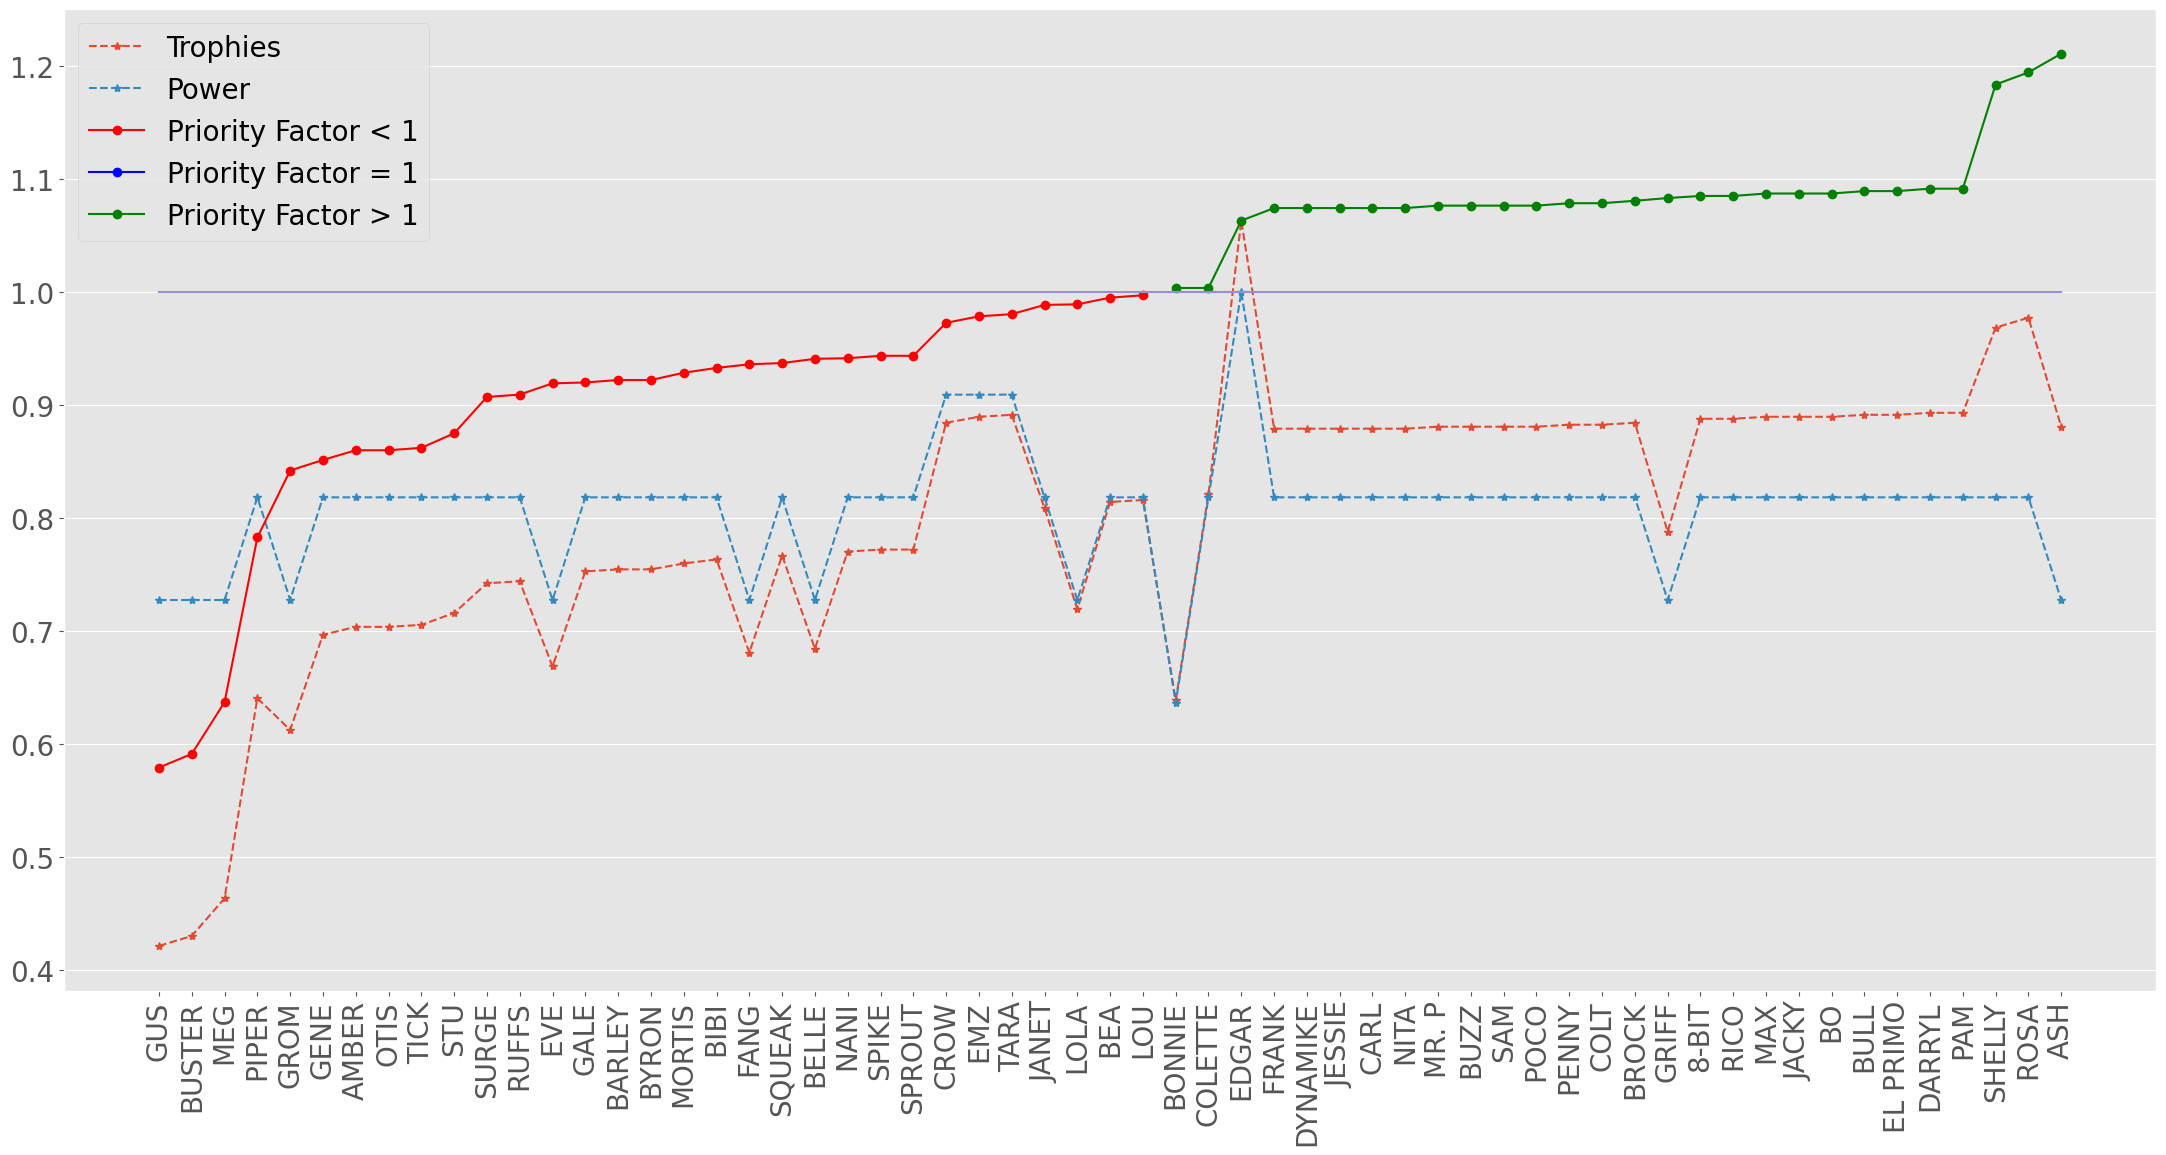

In [30]:
plt.figure(figsize=(27,13), dpi=dpi)
plt.plot(range(df_norm.shape[0]), df_norm['Trophies'], '*--')
plt.plot(range(df_norm.shape[0]), df_norm['Power'], '*--')
plt.plot(df_norm['Brawler'][df_norm['Played'] - 1 < 0], df_norm['Played'][df_norm['Played'] - 1 < 0], 'o-', color = 'red')
plt.plot(df_norm['Brawler'][df_norm['Played'] - 1 == 0], df_norm['Played'][df_norm['Played'] - 1 == 0], 'o-', color = 'blue')

plt.plot(df_norm['Brawler'][df_norm['Played'] - 1 > 0], df_norm['Played'][df_norm['Played'] - 1 > 0], 'o-', color = 'green')
plt.plot(range(df_norm.shape[0]), [1 for i in range(df_norm.shape[0])], alpha = 1)
plt.xticks(rotation = 'vertical', size = 20) #range(df_norm.shape[0])
plt.yticks(size = 20)
plt.legend(['Trophies', 'Power', 'Priority Factor < 1', 'Priority Factor = 1','Priority Factor > 1'], fontsize = 20)
plt.grid(axis = 'x')
plt.savefig('line_plot.png', dpi = dpi)
 

In [31]:
df_norm = df_norm.sort_values(['Played','Trophies','Power'], ascending = [False, False, True])

## Normalized Power in PF Order

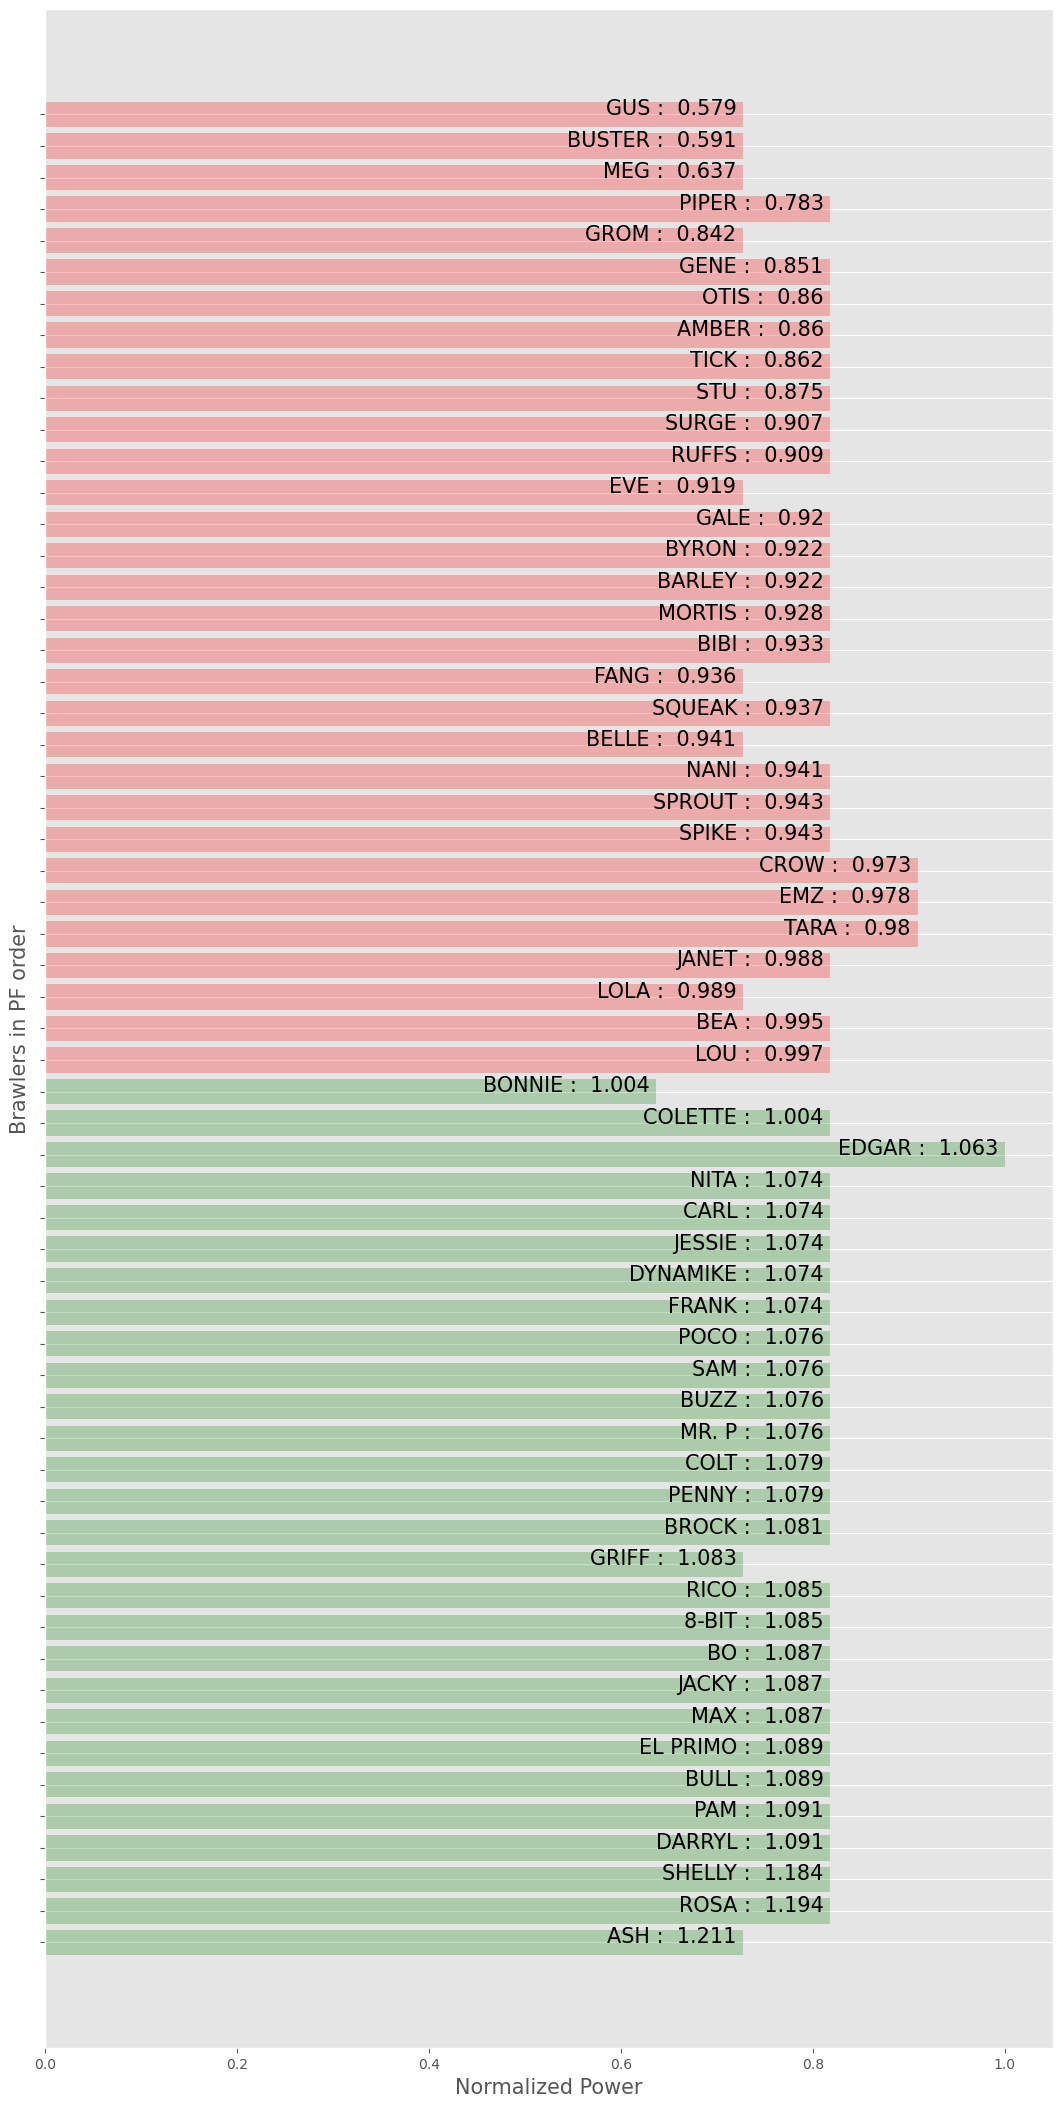

In [32]:
plt.figure(figsize=(13, 27), dpi=dpi)
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 > 0], df_norm['Power'][df_norm['Played'] - 1 > 0] , color = 'green', alpha = 0.25) # + abs(df_norm['Played'].min()
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 == 0], df_norm['Power'][df_norm['Played'] - 1 == 0] , color = 'blue', alpha = 0.25) # + abs(df_norm['Played'].min()
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 < 0], df_norm['Power'][df_norm['Played'] - 1 < 0] , color = 'red', alpha = 0.25) # + abs(df_norm['Played'].min()
plt.yticks(df_norm['Brawler'], ['' for i in range(df_norm.shape[0])],size = 15)
plt.xticks(size = 10)
plt.xlabel('Normalized Power',size = 15)
plt.ylabel('Brawlers in PF order',size = 15)
plt.grid(axis = 'x')
for i, label in enumerate(df_norm['Brawler']):
    plt.annotate(label+' :  '+str(round(df_norm.iloc[i,7], 3))+' ', (df_norm.iloc[i,3], label), ha = 'right', size = 15)
plt.savefig("barh_plot_2.png", dpi = dpi)

## Normalized Trophies in PF Order

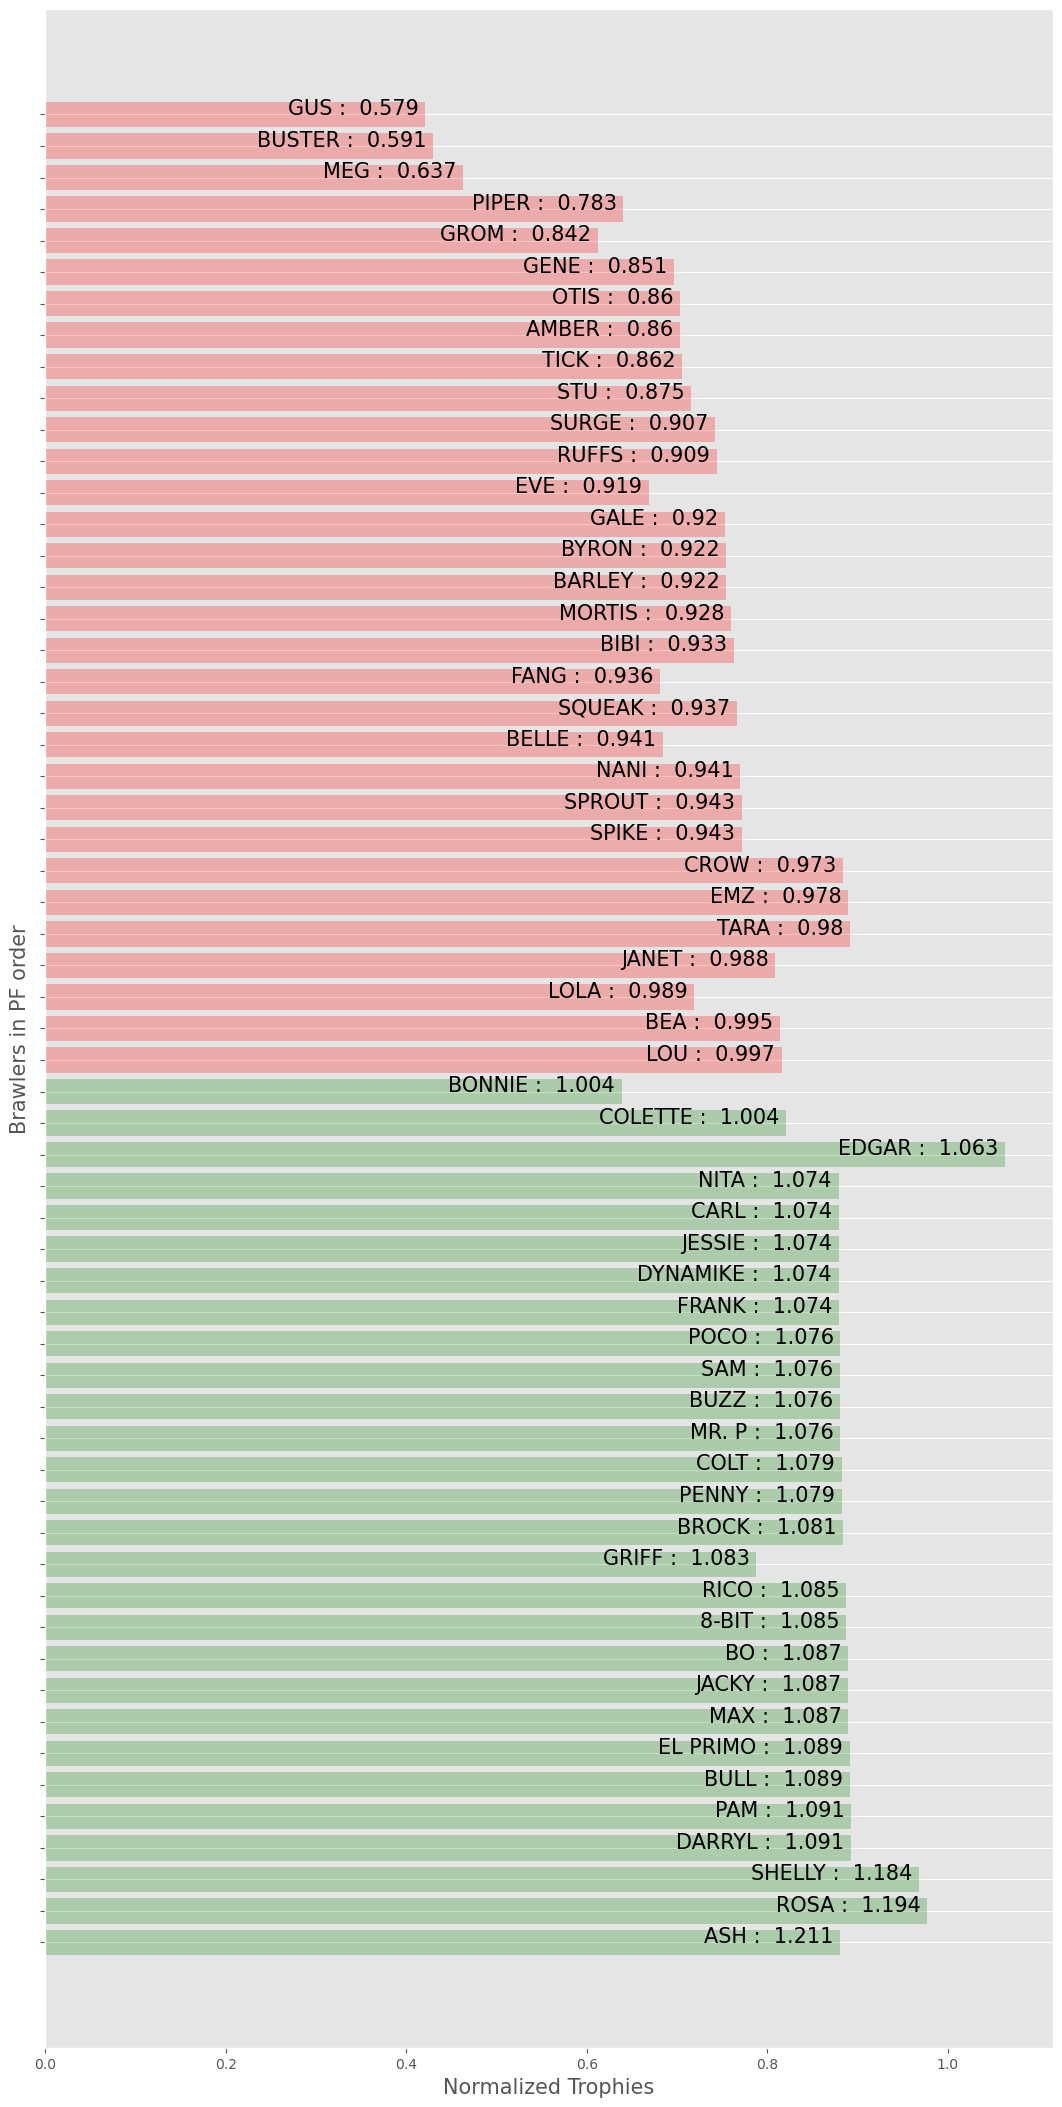

In [33]:
plt.figure(figsize=(13, 27), dpi=dpi)
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 > 0], df_norm['Trophies'][df_norm['Played'] - 1 > 0] , color = 'green', alpha = 0.25) # + abs(df_norm['Played'].min()
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 == 0], df_norm['Trophies'][df_norm['Played'] - 1 == 0] , color = 'blue', alpha = 0.25) # + abs(df_norm['Played'].min()
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 < 0], df_norm['Trophies'][df_norm['Played'] - 1 < 0] , color = 'red', alpha = 0.25) # + abs(df_norm['Played'].min()
plt.yticks(df_norm['Brawler'], ['' for i in range(df_norm.shape[0])],size = 15)
plt.xticks(size = 10)
plt.xlabel('Normalized Trophies',size = 15)
plt.ylabel('Brawlers in PF order',size = 15)
plt.grid(axis = 'x')
for i, label in enumerate(df_norm['Brawler']):
    plt.annotate(label+' :  '+str(round(df_norm.iloc[i,7], 3))+' ', (df_norm.iloc[i,1], label), ha = 'right', size = 15)
plt.savefig("barh_plot_1.png", dpi = dpi)

## Brawlers in Ascending Order of (PF - 1)

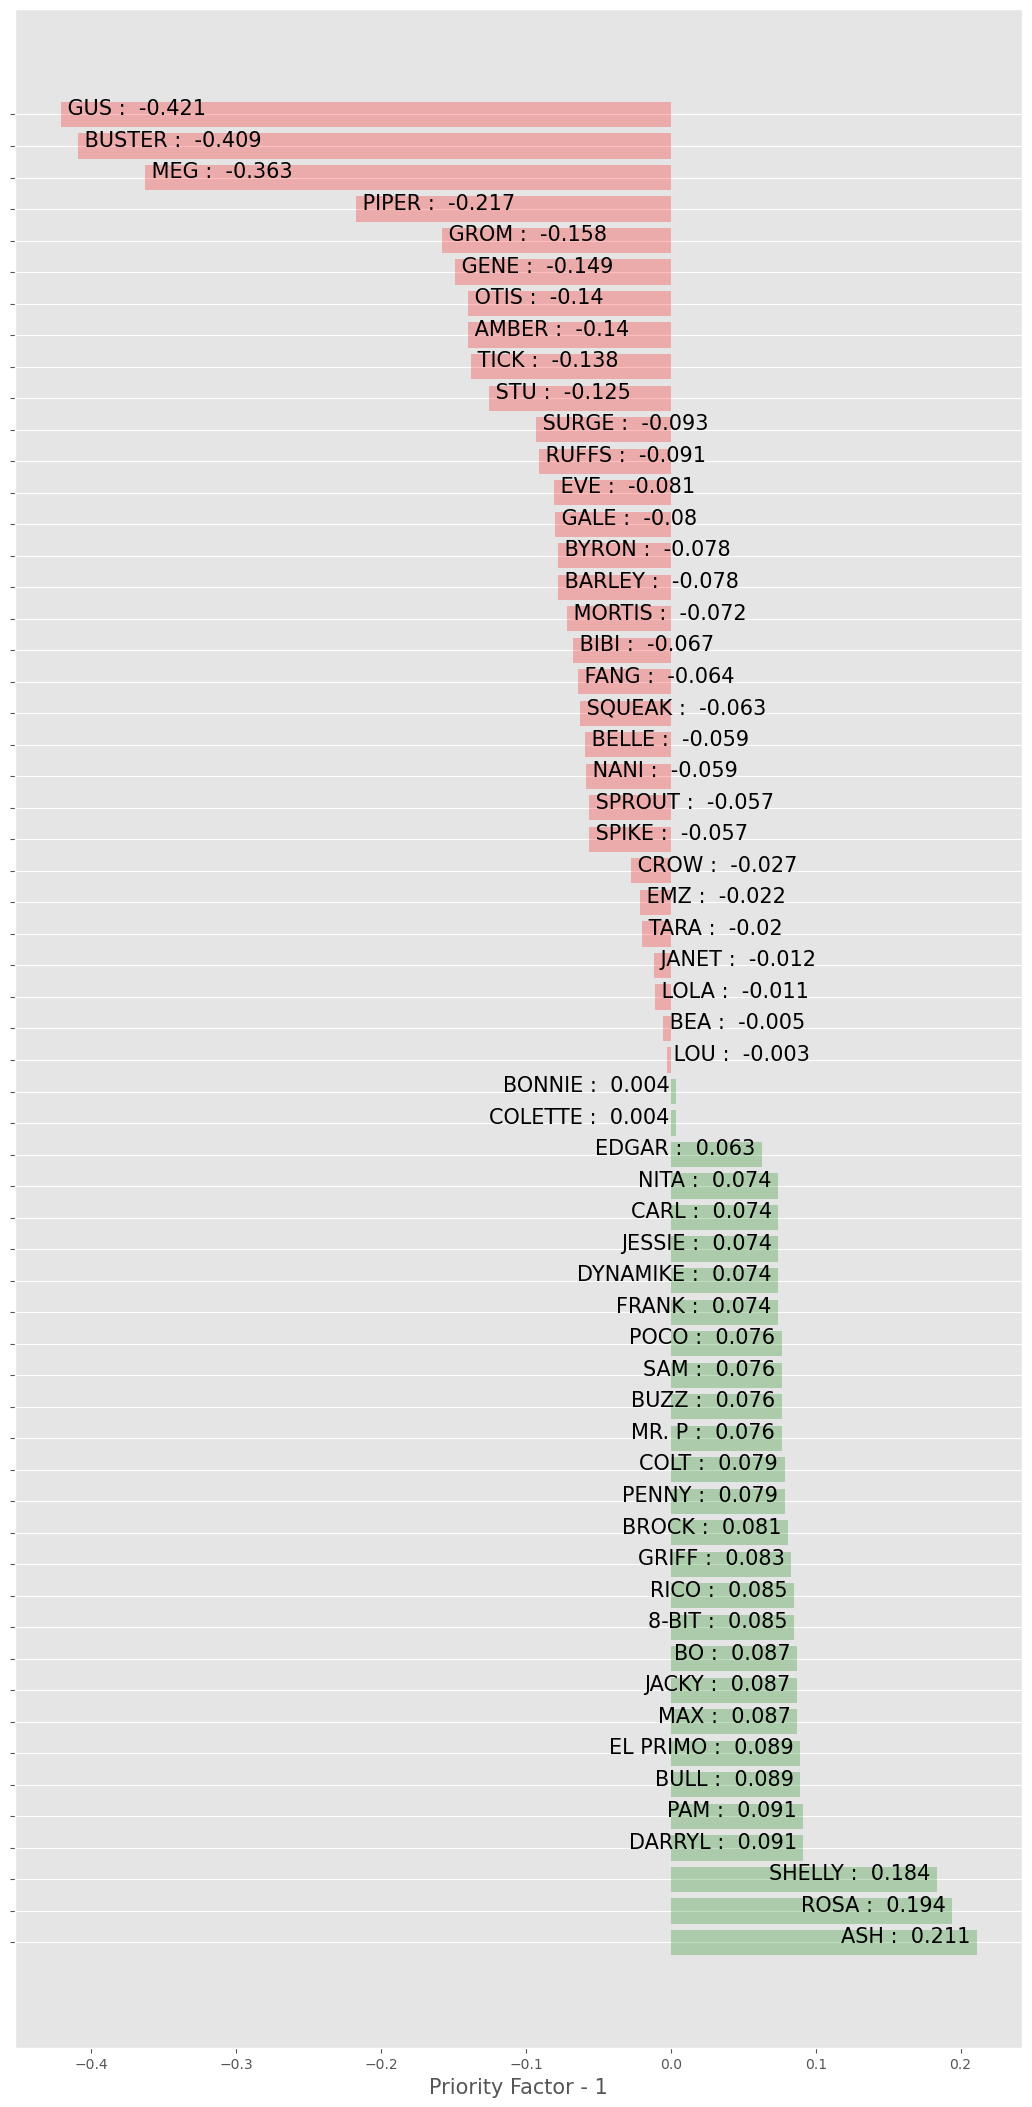

In [34]:
plt.figure(figsize=(13, 27), dpi=dpi)
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 > 0], df_norm['Played'][df_norm['Played'] - 1 > 0] - 1, color = 'green', alpha = 0.25)
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 == 0], df_norm['Played'][df_norm['Played'] - 1 == 0] - 1, color = 'blue', alpha = 0.25)
plt.barh(df_norm['Brawler'][df_norm['Played'] - 1 < 0], df_norm['Played'][df_norm['Played'] - 1 < 0] - 1, color = 'red', alpha = 0.25)
plt.yticks(df_norm['Brawler'], ['' for i in range(df_norm.shape[0])],size = 15)
plt.xticks(size = 10)
plt.xlabel('Priority Factor - 1',size = 15)
plt.grid(axis = 'x')
for i, label in enumerate(df_norm['Brawler']):
    if df_norm.iloc[i,7] - 1 < 0:
        plt.annotate(' '+label+' :  '+str(round(df_norm.iloc[i,7] - 1, 3))+'', (df_norm.iloc[i,7] - 1, label), ha = 'left', size = 15)
    elif df_norm.iloc[i,7] - 1 == 0:
        plt.annotate(label+' :  '+str(round(df_norm.iloc[i,7] - 1, 3))+'', (df_norm.iloc[i,7] - 1, label), ha = 'center', size = 15)
    else:
        plt.annotate(label+' :  '+str(round(df_norm.iloc[i,7] - 1, 3))+''+' ', (df_norm.iloc[i,7] - 1, label), ha = 'right', size = 15)
plt.savefig('barh_plot.png', dpi = dpi)

## Kernel Density Plot with Bandwidth = 0.1
The below graph helps us compare the smoothened distribution of normalized trophies and power with more accuracy and less precision

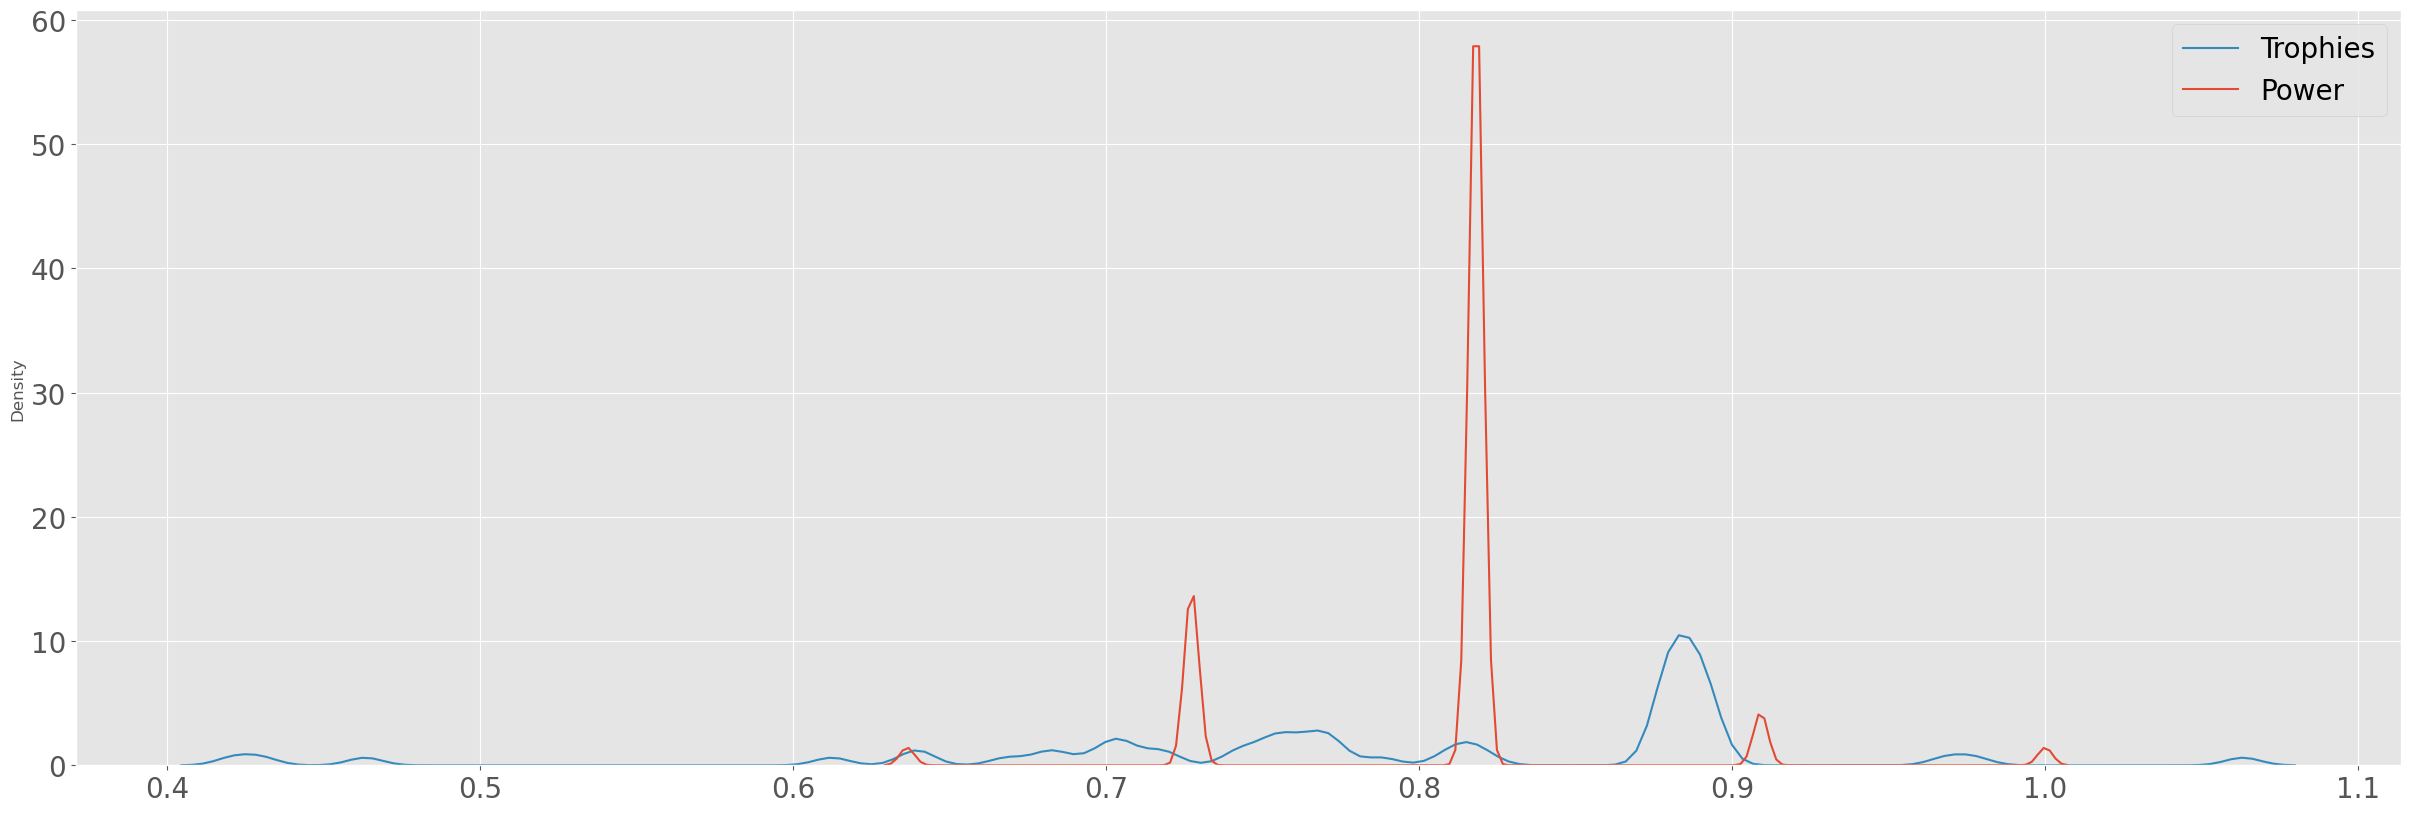

In [35]:
plt.figure(figsize=(30,10), dpi=dpi)
sns.kdeplot(data=df_norm[['Power', 'Trophies']], bw_adjust = 0.1)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(['Trophies', 'Power'], fontsize = 20)

## Kernel Density Plot with Bandwidth = 1
The below graph helps us compare the smoothened distribution of normalized trophies and power with less accuracy and more precision

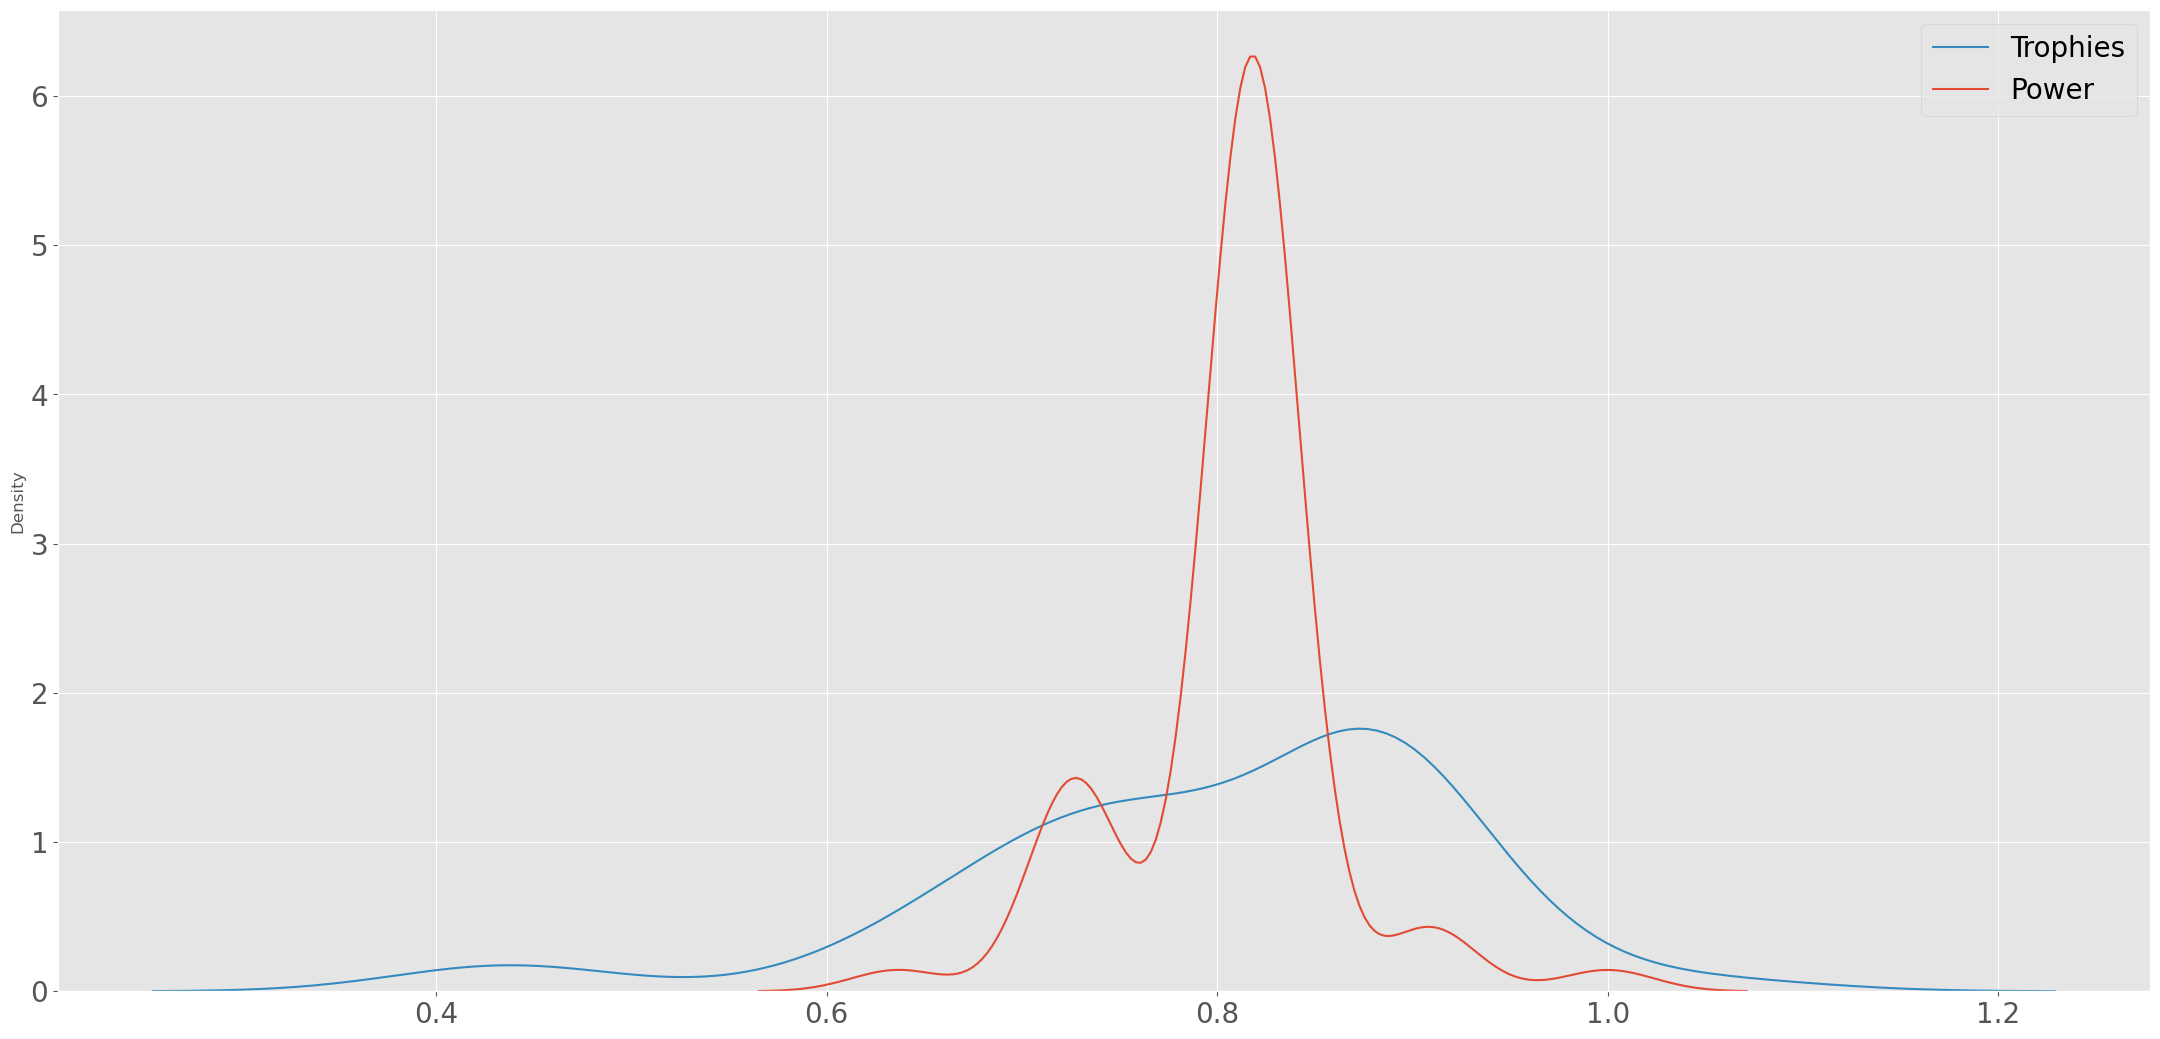

In [36]:
plt.figure(figsize=(27,13), dpi=dpi)
sns.kdeplot(data=df_norm[['Power', 'Trophies']], bw_adjust = 1)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(['Trophies', 'Power', 'Attention Factor'], fontsize = 20)

In [37]:
os.remove('barh_plot.png')
os.remove('barh_plot_1.png')
os.remove('barh_plot_2.png')
os.remove('line_plot.png')
os.remove('scatter_plot.png')
os.remove('scatter_plot_1.png')
os.remove('logs_Correlation.png')
os.remove('logs_Trophies_by_Power_norm.png')
os.remove('logs_Angle_of_Spread.png')
os.remove('logs_Total_Trophies.png')

In [38]:
vis_end_time = time.time()

# Mailer
The charts and results will be mailed to the mail ID provided in the config.py file.

Please allow less secure apps to use the mail in the mail settings to allow this feature.

In [39]:
if Mailer:
    Email_str = ('Brawler Balance and Optimisation Report\n\n'+
                 'Total number of Trophies🏆: '+str(df_real['Trophies'].sum())+'\n\n'+
                 'Angle of spread: '+str(theta)+' degrees\n\n'+
                 'Pearson\'s Correlation: '+str(df_norm['Trophies'].corr(df_norm['Power']))+'\n\n'+
                 'Priority order:\n'+
                 Trophies_str+'\n\n'+
                 'Report instantiated at: '+str(start_datetime)+'\n'+
                 'Created at: '+str(datetime.now().strftime("%c"))+'\n'+
                 'DPI of Visualisations: '+str(dpi)+'\n'+
                 'Time taken to generate the report: '+str(round(vis_end_time - start_time, 4))+' s')

    message=(Email_str,'line_plot.png','barh_plot.png','barh_plot_1.png','barh_plot_2.png','scatter_plot.png','scatter_plot_1.png','logs_Total_Trophies.png','logs_Angle_of_Spread.png','logs_Correlation.png')
    sender=yagmail.SMTP(sender_)
    sender.send(to=receiver,subject="Brawl Stars Report",contents=message)
    print('Mail has been sent to '+receiver)
else:
    print('Mailer has been turned off')

Mailer has been turned off


# Logs
Previous five logs will be displayed here.

In [40]:
if Logs:
    print(df_logs.tail())

     Total Trophies  Angle of Spread  Correlation  Correlation Red  \
194         26301.0        31.898536     0.710492         0.816925   
195         26369.0        22.804548     0.712046         0.826236   
196         26388.0        20.500386     0.711214         0.826645   
197         26564.0        20.370319     0.657449         0.772872   
198         26798.0        20.381940     0.641365         0.790424   

     Correlation Green  Power Mean  Trophies Mean  Power Mean Norm  \
194           0.866338    8.779661     445.779661         0.798151   
195           0.881684    8.779661     446.932203         0.798151   
196           0.881684    8.779661     447.254237         0.798151   
197           0.839520    8.813559     450.237288         0.801233   
198           0.863153    8.881356     454.203390         0.807396   

     Trophies Mean Norm        Date                    Datetime  
194            0.784823  2022-12-02  2022-12-02 09:04:11.863659  
195            0.784092  2

# Metrics
Brawler specific and general metrics will be displayed here.

In [41]:
print('Total number of Trophies : '+str(df_real['Trophies'].sum())+'\n\n'+
      'Angle of spread          : '+str(round(theta, 2))+' degrees\n\n'+
     'Pearson\'s Correlation    : '+str(round(df_norm['Trophies'].corr(df_norm['Power']), 2))+'\n\n')
#                  'Priority order:\n'+
#                  Trophies_str+'\n\n')
name = str(input('Enter the name of the Brawler: ')).upper()
if name != '':
    print('Trophies                     : ' + str(df_real['Trophies'][df_real['Brawler'] == name].iloc[0]))
    print('Power                        : ' + str(df_real['Power'][df_real['Brawler'] == name].iloc[0]))
    print('Target Trophies              : ' + str(math.ceil(df_real['Power'][df_real['Brawler'] == name].iloc[0]*(df_real['Trophies'].mean() / df_real['Power'].mean()))))
    print('Number of Trophies needed    : ' + str(math.ceil(df_real['Power'][df_real['Brawler'] == name].iloc[0]*(df_real['Trophies'].mean() / df_real['Power'].mean())) - df_real['Trophies'][df_real['Brawler'] == name].iloc[0]))

# print('\n')
# print('Report instantiated at            : '+str(start_datetime)+'\n'+
#                  'Created at                        : '+str(datetime.now().strftime("%c"))+'\n'+
#                  'DPI of Visualisations             : '+str(dpi)+'\n'+
#                  'Time taken to generate the report : '+str(round(vis_end_time - start_time, 4))+' s')

Total number of Trophies : 26798

Angle of spread          : 20.38 degrees

Pearson's Correlation    : 0.64


Enter the name of the Brawler: 


In [42]:
end_time = time.time()

# End of the Report
## Important Goals:
- We should keep up with the highest number of trophies acheived.

- Trophies should be gained for the red zone brawlers.

- Power should be gained for the green zone brawlers, it's okay to loose trophies for them too.

- Correlation of brawlers should be increased. To make them more balanced. 

- Angle of Spread in Scatter plots should be decreased. To decrease outliers.

- Normalized Trophies / Normalized Power depicts our performance which should be increased.

- In KDE plots, the Trophies distribution should be either alligned or right to the Power distribution
## Balance of the Brawlers
Here, when I say balance, I mean for the brawler, when the power is high, the number of trophies should be higher and when the power is low, the number of trophies should be lower. When plotted in chart they all should allign on straight line. If we can push brawler with high power from low trophies to high trophies, we'll be able master the brawler in the process and thus allowing to have higher winning chance when facing THEM making you consistently good at all brawlers and gives you many options to play in any match. Priority Factor and Trophies and Power of a brawler and their position among other brawlers in these regards helps us understand our play style and helps us improve in many different aspects.
###### *Author : xlone.wolfx*